In [1]:
from google.colab import files

uploaded = files.upload()

Saving attackdata.json to attackdata.json
Saving testdata.json to testdata.json
Saving testdata2.json to testdata2.json
Saving testdata3.json to testdata3.json
Saving testdata5.json to testdata5.json
Saving testdata6.json to testdata6.json
Saving testdata7.json to testdata7.json
Saving testdata9.json to testdata9.json
Saving testdata10.json to testdata10.json


In [2]:
import numpy as np
from sklearn.mixture import GaussianMixture
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean
import torch.nn.functional as F
!pip install torchmetrics
from tokenizers import Tokenizer
import pandas as pd
import matplotlib.pyplot as plt
!pip install utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

###Preprocessing and encoding

In [4]:
import json

# Assuming your JSON file is named "data.json"
with open('testdata.json', 'r') as f:
    data = json.load(f)

dataset=data

with open('testdata2.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata3.json', 'r') as f:
    data = json.load(f)

dataset+=data

# with open('testdata4.json', 'r') as f:
#     data = json.load(f)

# dataset+=data

with open('testdata5.json', 'r') as f:
    data = json.load(f)

dataset+=data
# with open('testdata6.json', 'r') as f:
#     data = json.load(f)

# dataset+=data
with open('testdata7.json', 'r') as f:
    data = json.load(f)

dataset+=data
# with open('testdata8.json', 'r') as f:
#     data = json.load(f)

# dataset+=data
with open('testdata9.json', 'r') as f:
    data = json.load(f)

dataset+=data

In [5]:
print(dataset[0])

[{'BlockNumber': 18907961, 'TxHash': '0x958aeec58ea2f0f9700adda24e43fb76f9e052e4c20773f180c49d7529d95f16', 'CallList': [{'to': '0x1bf68a9d1eaee7826b3593c20a0ca93293cb489a', 'from': '0x9263e7873613ddc598a701709875634819176aff', 'value': '0.0', 'gas': '0.000000000000158695', 'input': '0x2ac5ab1b'}, [[{'to': '0xc3430bc8c2c05fc6b42114bf7f82a3e2f3ee9454', 'from': '0x1bf68a9d1eaee7826b3593c20a0ca93293cb489a', 'value': '0.0', 'gas': '0.0000000000001183', 'input': '0x2ac5ab1b'}, [{'to': '0x0000000000000000000000000000000000000002', 'from': '0x1bf68a9d1eaee7826b3593c20a0ca93293cb489a', 'value': '0.0', 'gas': '0.000000000000000072', 'input': '0x1bf68a9d1eaee7826b3593c20a0ca93293cb489a4f52424954'}, {'to': '0x0000000000000000000000000000000000000002', 'from': '0x1bf68a9d1eaee7826b3593c20a0ca93293cb489a', 'value': '0.0', 'gas': '0.000000000000000072', 'input': '0x1bf68a9d1eaee7826b3593c20a0ca93293cb489a4f52424954'}, {'to': '0x0000000000000000000000000000000000000002', 'from': '0x1bf68a9d1eaee7826b3

In [6]:
print(len(dataset))
print(dataset[0:10])

def hex_to_float32(hex_value):
    max_value=1e6
    # Remove '0x' prefix if present
    hex_value = hex_value.replace('0x', '')

    if not hex_value:
        hex_value = '0'

    # Convert hexadecimal to decimal
    decimal_value = int(hex_value, 16)

    # Scale down large values
    if decimal_value >= max_value:
        decimal_value = decimal_value%max_value

    # Convert decimal to float32
    float32_value = np.float32(decimal_value)

    return float32_value

def preprocess(dataset):
  flat_dataset = [item for sublist in dataset for item in sublist]


  def store_calls(data):
    calllist=[]
    for cur in data:
      cur['CallList'][1]=cur['CallList'][1][0]
      calllist.append(cur['CallList'])

    return calllist
  print(len(flat_dataset))
  calls=store_calls(flat_dataset)
  print(len(calls))
  def unnest(nested_list, level=0):
      encoded_list = []

      for item in nested_list:
          if isinstance(item, list):
              nested_encoded = unnest(item, level + 1)
              encoded_list.extend(nested_encoded)
          else:
              encoded_list.append(hex_to_float32(item["to"]))
              encoded_list.append(hex_to_float32(item["from"]))
              encoded_list.append(float(item["value"]))
              encoded_list.append(float(item["gas"]))
              encoded_list.append(hex_to_float32(item["input"]))
              encoded_list.append(float(level))

      return encoded_list



  unnested_calls=[]
    # Assuming each sublist in input_list is a sequence
  for seq in calls:
    unnested_calls.append(unnest(seq,0))
  return unnested_calls

unnested_calls=preprocess(dataset)

print(unnested_calls[0:10])

197
[[{'BlockNumber': 18907961, 'TxHash': '0x958aeec58ea2f0f9700adda24e43fb76f9e052e4c20773f180c49d7529d95f16', 'CallList': [{'to': '0x1bf68a9d1eaee7826b3593c20a0ca93293cb489a', 'from': '0x9263e7873613ddc598a701709875634819176aff', 'value': '0.0', 'gas': '0.000000000000158695', 'input': '0x2ac5ab1b'}, [[{'to': '0xc3430bc8c2c05fc6b42114bf7f82a3e2f3ee9454', 'from': '0x1bf68a9d1eaee7826b3593c20a0ca93293cb489a', 'value': '0.0', 'gas': '0.0000000000001183', 'input': '0x2ac5ab1b'}, [{'to': '0x0000000000000000000000000000000000000002', 'from': '0x1bf68a9d1eaee7826b3593c20a0ca93293cb489a', 'value': '0.0', 'gas': '0.000000000000000072', 'input': '0x1bf68a9d1eaee7826b3593c20a0ca93293cb489a4f52424954'}, {'to': '0x0000000000000000000000000000000000000002', 'from': '0x1bf68a9d1eaee7826b3593c20a0ca93293cb489a', 'value': '0.0', 'gas': '0.000000000000000072', 'input': '0x1bf68a9d1eaee7826b3593c20a0ca93293cb489a4f52424954'}, {'to': '0x0000000000000000000000000000000000000002', 'from': '0x1bf68a9d1eaee7

In [ ]:
print(dataset[0])

[{'BlockNumber': 15625410, 'TxHash': '0xc5f8f3448ff023c313c35579cc7ae704eef6be113a2edf0226e1171571d41cee', 'CallList': [{'to': '0xbadc0defafcf6d4239bdf0b66da4d7bd36fcf05a', 'from': '0x5354f00292296518713a47777bb6d2b9712fe74a', 'value': '0.0', 'gas': '0.000000000000168362', 'input': '0x69277b67'}, [{'to': '0xdd6bd08c29ff3ef8780bf6a10d8b620a93ac5705', 'from': '0xbadc0defafcf6d4239bdf0b66da4d7bd36fcf05a', 'value': '0.0', 'gas': '0.000000000000108744', 'input': '0x69277b67'}, [{'to': '0x2f9ec37d6ccfff1cab21733bdadede11c823ccb0', 'from': '0xbadc0defafcf6d4239bdf0b66da4d7bd36fcf05a', 'value': '0.0', 'gas': '0.000000000000035571', 'input': '0x0c8496cc'}, [{'to': '0x52ae12abe5d8bd778bd5397f99ca900624cfadd4', 'from': '0x2f9ec37d6ccfff1cab21733bdadede11c823ccb0', 'value': '0.0', 'gas': '0.000000000000002861', 'input': '0xbb34534c42616e636f72466f726d756c61'}, {'to': '0xb1cd6e4153b2a390cf00a6556b0fc1458c4a5533', 'from': '0x2f9ec37d6ccfff1cab21733bdadede11c823ccb0', 'value': '0.0', 'gas': '0.000000

In [7]:
import csv
csv_file_path = 'bad_contract.csv'

# Pad sequences to the maximum length in the dataset
max_sequence_length = max(len(seq) for seq in unnested_calls)
padded_data = [seq + [-1] * (max_sequence_length - len(seq)) for seq in unnested_calls]

# Write the list to a CSV file
with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for row in padded_data:
        writer.writerow(row)

print(f'CSV file "{csv_file_path}" has been created successfully.')

CSV file "bad_contract.csv" has been created successfully.


In [8]:
import numpy as np
import pandas as pd

minimum=0.0
maximum=0.0

def min_max_normalize(data, min=0.0, max=0.0):
    global minimum
    global maximum
    # Create a copy of the data array
    normalized_data = data.copy()

    # Find indices of non-zero elements
    nonzero_indices = np.where(normalized_data != 0.0)

    # Find the minimum and maximum values in the data (ignoring 0.0)
    if min + max == 0.0:
      print("This is the first normalization")
      min_value = np.min(normalized_data[nonzero_indices])
      max_value = np.max(normalized_data[nonzero_indices])
      minimum = min_value
      maximum = max_value
    else:
      min_value=min
      max_value=max

    # Normalize the non-zero data to be between 0 and 1
    normalized_data[nonzero_indices] = (normalized_data[nonzero_indices] - min_value) / (max_value - min_value)

    return normalized_data

def encode(data, max_length=0):
    # Calculate the maximum length of any column
    if max_length == 0:
      max_length = max(len(col) for col in data)+100

    padded_data = []
    for seq in data:
        if len(seq) > max_length:
            padded_seq = seq[:max_length]  # Truncate if sequence is too long
        else:
            padded_seq = seq + [0.0] * (max_length - len(seq))  # Pad with zeros
        padded_data.append(padded_seq)

    # Convert to numpy array
    print("SIZE")
    print(len(padded_data))
    print(len(padded_data[0]))
    padded_array = np.array(padded_data, dtype=float)

    # # Normalize each column independently
    normalized_array = np.apply_along_axis(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)) if np.max(x) != np.min(x) else x, axis=0, arr=padded_array)

    if max_length == 0:
      normalized_array = min_max_normalize(padded_array)
    else:
      normalized_array = min_max_normalize(padded_array, minimum, maximum)

    return normalized_array, max_length

# Example usage
input_data, maxL = encode(unnested_calls)
print(input_data)
print(input_data.shape)
print(maximum)
print(minimum)



SIZE
201
208
This is the first normalization
[[0.32431046 0.15503528 0.         ... 0.         0.         0.        ]
 [0.32431046 0.52001283 0.         ... 0.         0.         0.        ]
 [0.32431046 0.52001283 0.         ... 0.         0.         0.        ]
 ...
 [0.32431046 0.52001283 0.         ... 0.         0.         0.        ]
 [0.32431046 0.52001283 0.         ... 0.         0.         0.        ]
 [0.32431046 0.52001283 0.         ... 0.         0.         0.        ]]
(201, 208)
997760.0
7.2e-17


In [ ]:
print(type(input_data))

<class 'numpy.ndarray'>


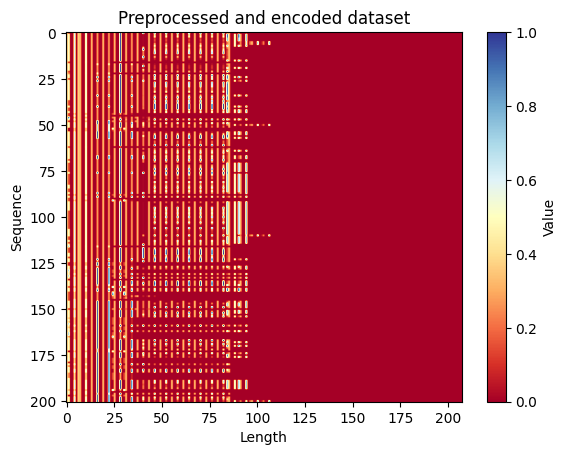

(201, 208)


In [9]:
def plot_patterns(data):
  plt.imshow(data, cmap='RdYlBu', aspect='auto')
  plt.colorbar(label='Value')
  plt.title('Preprocessed and encoded dataset')
  plt.xlabel('Length')
  plt.ylabel('Sequence')
  plt.show()


plot_patterns(input_data)
print(input_data.shape)

prep_data=input_data


###DAGMM


Epoch 0/100,TRAIN Loss: 103.9311 - TEST Loss: 46.1286
Epoch 10/100,TRAIN Loss: 2.3170 - TEST Loss: 2.0795
Epoch 20/100,TRAIN Loss: 1.3160 - TEST Loss: 1.2005
Epoch 30/100,TRAIN Loss: 0.7890 - TEST Loss: 0.7172
Epoch 40/100,TRAIN Loss: 0.4403 - TEST Loss: 0.3897
Epoch 50/100,TRAIN Loss: 0.1810 - TEST Loss: 0.1418
Epoch 60/100,TRAIN Loss: -0.0188 - TEST Loss: -0.0270
Epoch 70/100,TRAIN Loss: -0.2049 - TEST Loss: -0.2105
Epoch 80/100,TRAIN Loss: -0.4105 - TEST Loss: -0.4057
Epoch 90/100,TRAIN Loss: -0.5464 - TEST Loss: -0.5327


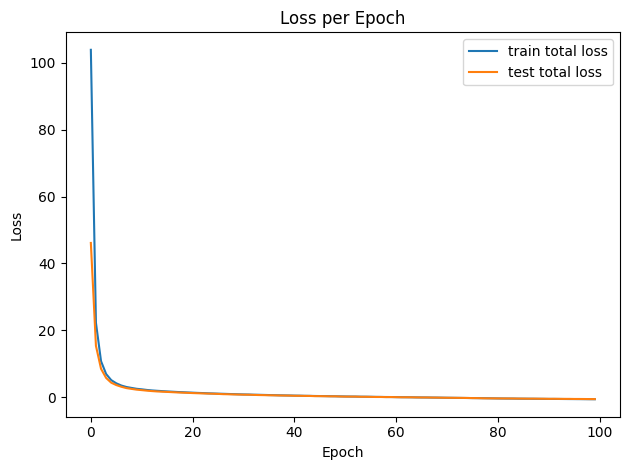

In [101]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from torch.autograd import Variable
import tensorflow as tf


# Define Deep Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim1),
            nn.Tanh(),
            nn.Linear(hidden_dim1, hidden_dim2),
            nn.Tanh(),
            nn.Linear(hidden_dim2, hidden_dim3),
            nn.Tanh(),
            nn.Linear(hidden_dim3, latent_dim-2)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim-2, hidden_dim3),
            nn.Tanh(),
            nn.Linear(hidden_dim3, hidden_dim2),
            nn.Tanh(),
            nn.Linear(hidden_dim2, hidden_dim1),
            nn.Tanh(),
            nn.Linear(hidden_dim1, input_dim)
        )

    def forward(self, x):
        z = self.encoder(x)
        x_hat = self.decoder(z)
        return z, x_hat

# Define DAGMM Model
class DAGMM(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim, n_gmm):
        super(DAGMM, self).__init__()
        self.autoencoder = Autoencoder(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim)
        self.estimation_network = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim3),
            nn.Tanh(),
            nn.Dropout(p=0.5),
            nn.Linear(hidden_dim3, n_gmm),
            nn.Softmax(dim=1)
        )
        self.phi = torch.zeros(n_gmm)
        self.mu = torch.zeros(n_gmm,latent_dim)
        self.cov = torch.zeros(n_gmm, latent_dim, latent_dim)
        self.n_gmm=n_gmm
        self.latent_dim=latent_dim

    def relative_euclidean_distance(self, a, b):
        return (a-b).norm(2, dim=1) / a.norm(2, dim=1)

    def compute_cosine_similarity(self, x, x_hat):
        cosine_similarity = F.cosine_similarity(x, x_hat, dim=1)
        return cosine_similarity

    def cov_diag_loss(self):
        cov_inv = torch.zeros(self.cov.size(0), self.cov.size(1), self.cov.size(1), device=self.cov.device)
        det_cov = torch.zeros(self.cov.size(0), device=self.cov.device)
        cov_diag = 0
        for i in range(self.cov.size(0)):
            cov_k = self.cov[i].clone()
            cov_k += torch.diag(torch.full((self.cov.size(1),), 1e-12, device=self.cov.device))
            cov_inv[i] = torch.linalg.inv(cov_k)
            u, s, v = torch.svd(cov_k)
            det_cov[i] = s.prod() ** 2
            cov_diag += torch.sum(1 / cov_k.diag())

        return cov_diag, cov_inv, det_cov


    def forward(self, x):
        z, x_hat = self.autoencoder(x)
        rec_euclidean = self.relative_euclidean_distance(x, x_hat)
        cosine_similarity = self.compute_cosine_similarity(x,x_hat)
        z_with_errors = torch.cat([z, rec_euclidean.unsqueeze(-1), cosine_similarity.unsqueeze(-1)], dim=1)
        gamma = self.estimation_network(z_with_errors)
        return z, x_hat, z_with_errors, gamma


    def compute_energy(self, z):
        cov_diag, cov_inv, det_cov = self.cov_diag_loss()
        z_mu = (z.unsqueeze(1)- self.mu.unsqueeze(0))
        z_mu_cov_inv = torch.sum(z_mu.unsqueeze(-1) * cov_inv.unsqueeze(0), dim=-2)
        exp_term = torch.exp(-0.5 * torch.sum(z_mu_cov_inv * z_mu, dim=-1))
        positive_exp_term = (-0.5 * torch.sum(z_mu_cov_inv * z_mu, dim=-1)).clamp(min=0)
        max_positive_exp_term = torch.max(positive_exp_term, dim=1, keepdim=True)[0]
        energy = -max_positive_exp_term.squeeze() - torch.log(
            torch.sum(self.phi.unsqueeze(0) * exp_term / (torch.sqrt(det_cov)).unsqueeze(0), dim=1) + 1e-12
        )
        return energy



    def loss_function(self, x, lambda_energy, lambda_cov_diag):
        _, x_hat, z, gamma, = self(x)
        N = gamma.size(0)
        sum_gamma = torch.sum(gamma, dim=0)
        if model.training:
          self.phi = (sum_gamma / N)
          self.mu = torch.sum(gamma.unsqueeze(-1) * z.unsqueeze(1), dim=0) / sum_gamma.unsqueeze(-1)
          z_mu = (z.unsqueeze(1)- self.mu.unsqueeze(0))
          z_mu_outer = z_mu.unsqueeze(-1) * z_mu.unsqueeze(-2)
          self.cov = torch.sum(gamma.unsqueeze(-1).unsqueeze(-1) * z_mu_outer, dim = 0) / sum_gamma.unsqueeze(-1).unsqueeze(-1)
        sample_energy = self.compute_energy(z)
        loss = torch.mean((x - x_hat) ** 2) + lambda_energy * torch.mean(sample_energy) + lambda_cov_diag * self.cov_diag_loss()[0]
        return loss

    def get_energy(self, x,  torch_type=True):
        enc, dec, z, gamma = self(x)
        energy = self.compute_energy(z)
        ret_energy=energy.data.numpy()

        if torch_type == True:
          ret_energy=torch.from_numpy(ret_energy)

        return ret_energy


# Hyperparameters
input_dim = len(prep_data[0])
hidden_dim1 = 400
hidden_dim2 = 200
hidden_dim3 = 30
latent_dim = 3
n_gmm = 5
lr = 1e-4
epochs = 100
lambda_energy=0.1
lambda_cov_diag=0.005
batch_size = 40

# Create model and optimizer
model = DAGMM(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim, n_gmm)
optimizer = optim.Adam(model.parameters(), lr=lr)

train_data, test_data = train_test_split(torch.tensor(prep_data, dtype=torch.float), test_size=0.25, random_state=40)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Training function
def train(model, train_loader, test_loader, optimizer, num_epochs):
    train_losses = []
    test_losses = []
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0.0
        epoch_loss_test = 0.0
        running_loss = 0.0
        test_running_loss=0.0
        count=0
        count_test=0
        for batch_idx, data in enumerate(train_loader):
            optimizer.zero_grad()
            total_loss = model.loss_function(data, lambda_energy, lambda_cov_diag)
            model.zero_grad()
            total_loss.backward()
            # torch.nn.utils.clip_grad_norm_(model.parameters(), 10)
            optimizer.step()
            running_loss += total_loss.item()

            loss = []
            loss.append( total_loss.item())
            count+=1
        epoch_loss=running_loss/count
        train_losses.append(epoch_loss)

        model.eval()
        with torch.no_grad():
            for batch_idx, data in enumerate(test_loader):
                test_loss = model.loss_function(data, lambda_energy, lambda_cov_diag)
                loss = []
                loss.append( test_loss.item())
                test_running_loss += test_loss.item()
                count_test+=1
        epoch_loss_test=test_running_loss/count_test
        test_losses.append(epoch_loss_test)
        if epoch%10 == 0:
          print(f"Epoch {epoch}/{num_epochs},TRAIN Loss: {epoch_loss:.4f} - TEST Loss: {epoch_loss_test:.4f}")
    return train_losses, test_losses


# Plotting function
def plot_losses(loss_data):
    plt.plot(loss_data[0], label="train total loss")
    plt.plot(loss_data[1], label="test total loss")
    plt.title('Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    # plt.ylim(loss_data[1][len(loss_data[0])-1]-2,loss_data[1][len(loss_data[0])-1]+2)
    plt.show()



# Train the model
losses = train(model, train_loader, test_loader, optimizer, epochs)

# Test the model
# test_losses = test(model, test_loader)

# avg_test_energy = sum(test_energy) / len(test_energy)

# Plot losses
plot_losses(losses)  # Broadcasting test loss to match training loss length
# print("Average Test Energy: ", avg_test_energy)
# plot_losses(test_losses)

threshold 3.597555160522461
Detected 0 anomalies in test.
Detected 3 anomalies in train.


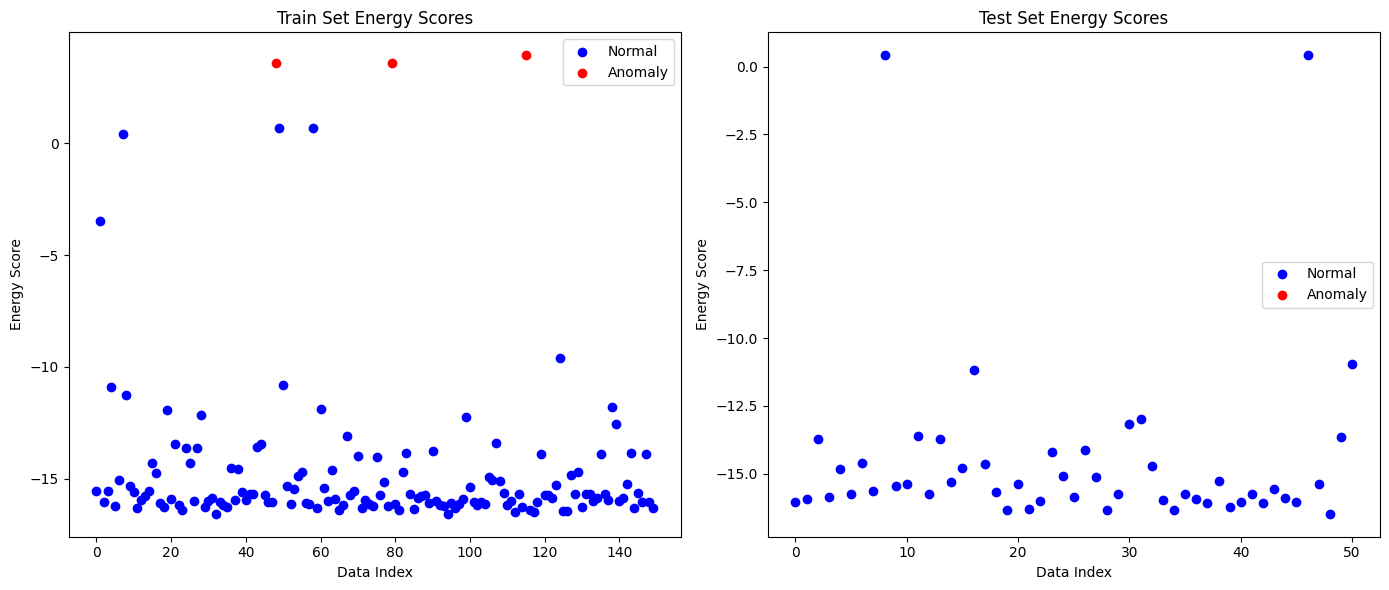

In [102]:
import matplotlib.pyplot as plt

# Compute energy scores for train and test data
train_energy = model.get_energy(train_data)
test_energy = model.get_energy(test_data)

all_energy=np.concatenate((train_energy, test_energy), axis=0)

threshold = np.percentile(all_energy, 99)
print(f"threshold {threshold}")

anomaly_indices_test=torch.where(test_energy >= threshold)[0]

# anomaly_indices = (np.array(eval_energy) > threshold).astype(int)[0]
print(f"Detected {len(anomaly_indices_test)} anomalies in test.")

anomaly_indices_train=torch.where(train_energy >= threshold)[0]

# anomaly_indices = (np.array(eval_energy) > threshold).astype(int)[0]
print(f"Detected {len(anomaly_indices_train)} anomalies in train.")

# Create plots
plt.figure(figsize=(14, 6))

# Train set plot
plt.subplot(1, 2, 1)
normal_train_indices = torch.where(train_energy < threshold)[0]
anomaly_train_indices = torch.where(train_energy >= threshold)[0]
plt.scatter(normal_train_indices, train_energy[normal_train_indices], c='blue', label='Normal')
plt.scatter(anomaly_train_indices, train_energy[anomaly_train_indices], c='red', label='Anomaly')
plt.title('Train Set Energy Scores')
plt.xlabel('Data Index')
plt.ylabel('Energy Score')
plt.legend()

# Test set plot
plt.subplot(1, 2, 2)
normal_test_indices = torch.where(test_energy < threshold)[0]
anomaly_test_indices = torch.where(test_energy >= threshold)[0]
plt.scatter(normal_test_indices, test_energy[normal_test_indices], c='blue', label='Normal')
plt.scatter(anomaly_test_indices, test_energy[anomaly_test_indices], c='red', label='Anomaly')
plt.title('Test Set Energy Scores')
plt.xlabel('Data Index')
plt.ylabel('Energy Score')
plt.legend()


plt.tight_layout()
plt.show()

In [103]:
# Find the index of the maximum energy score
max_energy_index = torch.argmax(train_energy)
print(train_energy[torch.argmax(train_energy)])

print("Index of the maximum energy score:", max_energy_index.item())
matching=train_data[max_energy_index]
matching_index = None
for i, node in enumerate(torch.tensor(prep_data, dtype=torch.float)):
    if np.array_equal(node, matching):
        matching_index = i
        break

flat_dataset = [item for sublist in dataset for item in sublist]
print("Index of matching node:", matching_index)
print("in dataset: ", flat_dataset[matching_index])

max_energy_index = torch.argmax(test_energy)
print(test_energy[max_energy_index])

print("Index of the maximum energy score:", max_energy_index.item())
matching=test_data[max_energy_index]
matching_index = None
for i, node in enumerate(torch.tensor(prep_data, dtype=torch.float)):
    if np.array_equal(node, matching):
        matching_index = i
        break

flat_dataset = [item for sublist in dataset for item in sublist]
print("Index of matching node:", matching_index)
print("in dataset: ", flat_dataset[matching_index])

tensor(3.9453)
Index of the maximum energy score: 115
Index of matching node: 44
in dataset:  {'BlockNumber': 18904466, 'TxHash': '0x3148539de3e1435c98a47b0069a83f42197b2c51d622be6bbbb02e4656216b14', 'CallList': [{'to': '0x1bf68a9d1eaee7826b3593c20a0ca93293cb489a', 'from': '0x27e2cc59a64d705a6c3d3d306186c2a55dcd5710', 'value': '0.0', 'gas': '0.000000000000100454', 'input': '0x0ac09684'}, [{'to': '0xc3430bc8c2c05fc6b42114bf7f82a3e2f3ee9454', 'from': '0x1bf68a9d1eaee7826b3593c20a0ca93293cb489a', 'value': '0.0', 'gas': '0.000000000000071986', 'input': '0x0ac09684'}, [{'to': '0x0000000000000000000000000000000000000002', 'from': '0x1bf68a9d1eaee7826b3593c20a0ca93293cb489a', 'value': '0.0', 'gas': '0.000000000000000072', 'input': '0x1bf68a9d1eaee7826b3593c20a0ca93293cb489a4f52424954'}, {'to': '0x0000000000000000000000000000000000000002', 'from': '0x1bf68a9d1eaee7826b3593c20a0ca93293cb489a', 'value': '0.0', 'gas': '0.000000000000000072', 'input': '0x1bf68a9d1eaee7826b3593c20a0ca93293cb489a4f5

5
5
90
144
SIZE
5
208


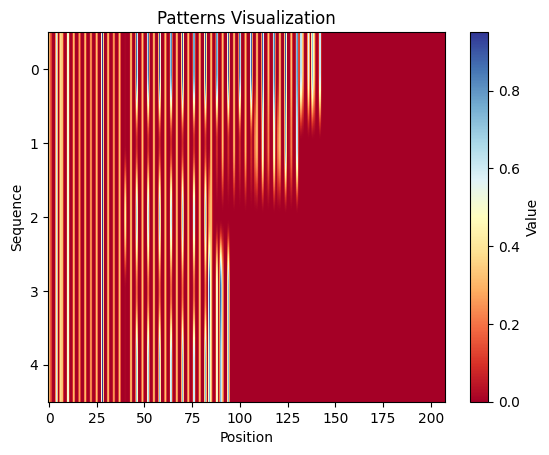

(5, 208)
eval 1:  tensor([ 13.1768, -13.3692, -15.7047, -15.9909, -15.8351])


In [104]:
with open('attackdata.json', 'r') as f:
    data = json.load(f)

anomally_dataset=data

anom1 = preprocess(anomally_dataset)

print(len(unnested_calls[0]))
print(len(anom1[0]))
anom_fin,_=encode(anom1, maxL)
anom = torch.tensor(anom_fin, dtype=torch.float)

def plot_patterns(data):
  plt.imshow(data, cmap='RdYlBu', aspect='auto')
  plt.colorbar(label='Value')
  plt.title('Patterns Visualization')
  plt.xlabel('Position')
  plt.ylabel('Sequence')
  plt.gca().yaxis.get_major_locator().set_params(integer=True)
  plt.show()


plot_patterns(anom_fin)
print(anom_fin.shape)

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
  res1=model.get_energy(anom)


print("eval 1: ", res1)


<class 'torch.Tensor'>
tensor([ 13.1768, -13.3692, -15.7047, -15.9909, -15.8351])
Found you


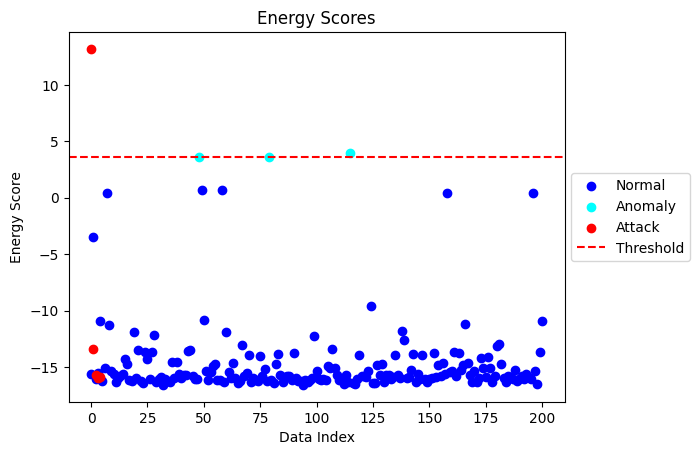

In [105]:
print(type(test_energy))

normal_energy=torch.cat((train_energy, test_energy), dim=0)

normal_indices = torch.where(normal_energy < threshold)[0]
anomaly_indices = torch.where(normal_energy >= threshold)[0]
attack = res1.detach()


plt.scatter(normal_indices, normal_energy[normal_indices], c='blue', label='Normal')
plt.scatter(anomaly_indices, normal_energy[anomaly_indices], c='cyan', label='Anomaly')
print(attack)
plt.scatter(range(len(attack)), attack, c='red', label='Attack')

plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.title('Energy Scores')
plt.xlabel('Data Index')
plt.ylabel('Energy Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

if(attack[0]>threshold):
  print("Found you")
else:
  print("try again")


25
25
SIZE
25
208


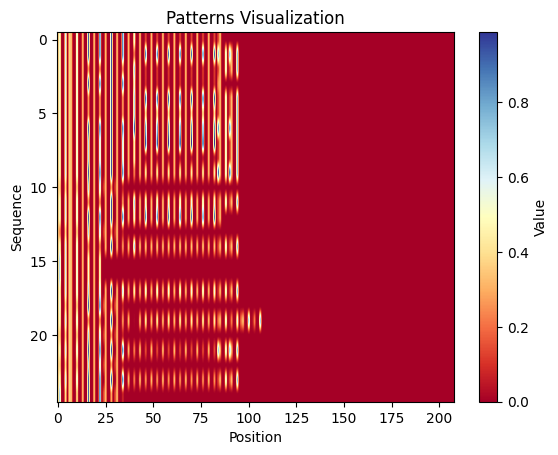

In [106]:
with open('testdata6.json', 'r') as f:
    data = json.load(f)

example_dataset=data

# with open('attackdata.json', 'r') as f:
#     data = json.load(f)

# example_dataset+=[data]


exam1 = preprocess(example_dataset)

exam_fin, _=encode(exam1, maxL)
exam = torch.tensor(exam_fin, dtype=torch.float)



plot_patterns(exam_fin)

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
  res2=model.get_energy(exam)



[]

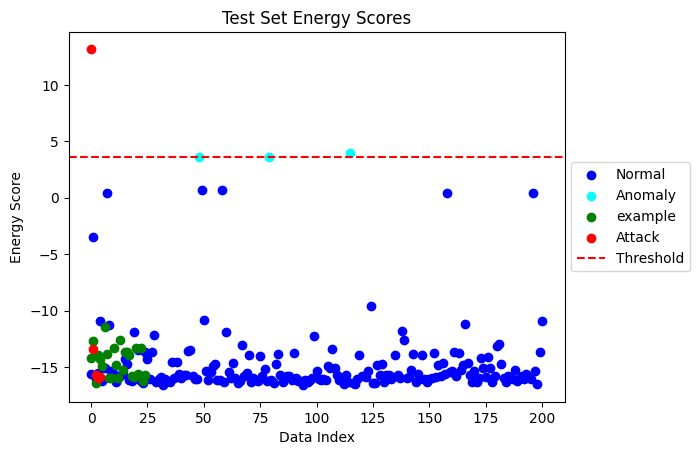

In [107]:
example = res2.detach()

plt.scatter(normal_indices, normal_energy[normal_indices], c='blue', label='Normal')
plt.scatter(anomaly_indices, normal_energy[anomaly_indices], c='cyan', label='Anomaly')
plt.scatter(range(len(example)), example, c='green', label='example')

plt.scatter(range(len(attack)), attack, c='red', label='Attack')

plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Test Set Energy Scores')
plt.xlabel('Data Index')
plt.ylabel('Energy Score')
plt.plot()


In [108]:
max_energy_index = torch.argmax(example)
print("Index of the maximum energy score:", max_energy_index.item())
matching=example[max_energy_index].item()
matching_index = None
# for i, node in enumerate(torch.tensor(exam_fin, dtype=torch.float)):
#     if np.array_equal(node, matching):
#         matching_index = i
#         break

flat_dataset = [item for sublist in example_dataset for item in sublist]
print("Energy found:", matching)
if matching != None:
  print("in dataset: ", flat_dataset[max_energy_index])

Index of the maximum energy score: 6
Energy found: -11.487518310546875
in dataset:  {'BlockNumber': 18889262, 'TxHash': '0x8c17dd8f9ceeab0da73751301c3ba9026da12c2f6f43daa71fb36837ae34907d', 'CallList': [{'to': '0x1bf68a9d1eaee7826b3593c20a0ca93293cb489a', 'from': '0xdc5432c573a1d4874d305a5cd7e62aed2b0bc522', 'value': '0.0', 'gas': '0.000000000000172055', 'input': '0x2ac5ab1b'}, [{'to': '0xc3430bc8c2c05fc6b42114bf7f82a3e2f3ee9454', 'from': '0x1bf68a9d1eaee7826b3593c20a0ca93293cb489a', 'value': '0.0', 'gas': '0.000000000000131444', 'input': '0x2ac5ab1b'}, [{'to': '0x0000000000000000000000000000000000000002', 'from': '0x1bf68a9d1eaee7826b3593c20a0ca93293cb489a', 'value': '0.0', 'gas': '0.000000000000000072', 'input': '0x1bf68a9d1eaee7826b3593c20a0ca93293cb489a4b4c4159544e'}, {'to': '0x0000000000000000000000000000000000000002', 'from': '0x1bf68a9d1eaee7826b3593c20a0ca93293cb489a', 'value': '0.0', 'gas': '0.000000000000000072', 'input': '0x1bf68a9d1eaee7826b3593c20a0ca93293cb489a4b4c4159544

In [109]:
def print_metrics(threshold, train_energy, test_energy, attack, example):

  print("the attack is found by the model: ", (attack[0] >= threshold).item())
  print("The threshold is: ", threshold)
  print("The energy value of the attack is: ", attack[0])
  print("the highest energy in train is: ", train_energy[torch.argmax(train_energy)])
  print("the highest energy in test is: ", test_energy[torch.argmax(test_energy)])
  print("the highest energy in example is: ", example[torch.argmax(example)])

  print("------------------")

  print("number of transactions with energy greater or equal to the threshold in train is: ", len(torch.where(train_energy >= threshold)[0]), " out of: ", len(train_energy))
  print("number of transactions with energy greater or equal to the threshold in test is: ", len(torch.where(test_energy >= threshold)[0]), " out of: ", len(test_energy))
  print("number of transactions with energy greater or equal to the threshold in example is: ", len(torch.where(example >= threshold)[0]), " out of: ", len(example))

  print("------------------")

  print("number of transactions with energy greater or equal to the attack in train is: ", len(torch.where(train_energy >= attack[0])[0]), " out of: ", len(train_energy))
  print("number of transactions with energy greater or equal to the attack in test is: ", len(torch.where(test_energy >= attack[0])[0]), " out of: ", len(test_energy))
  print("number of transactions with energy greater or equal to the attack in example is: ", len(torch.where(example >= attack[0])[0]), " out of: ", len(example))

  print("------------------")

  print("average energy value in train is: ",torch.mean(train_energy))
  print("average energy value in test is: ",torch.mean(test_energy))
  print("average energy value in example is: ",torch.mean(example))

print_metrics(threshold, train_energy, test_energy, attack, example)

the attack is found by the model:  True
The threshold is:  3.597555160522461
The energy value of the attack is:  tensor(13.1768)
the highest energy in train is:  tensor(3.9453)
the highest energy in test is:  tensor(0.4150)
the highest energy in example is:  tensor(-11.4875)
------------------
number of transactions with energy greater or equal to the threshold in train is:  3  out of:  150
number of transactions with energy greater or equal to the threshold in test is:  0  out of:  51
number of transactions with energy greater or equal to the threshold in example is:  0  out of:  25
------------------
number of transactions with energy greater or equal to the attack in train is:  0  out of:  150
number of transactions with energy greater or equal to the attack in test is:  0  out of:  51
number of transactions with energy greater or equal to the attack in example is:  0  out of:  25
------------------
average energy value in train is:  tensor(-14.5206)
average energy value in test is:

###True False

In i=  0
Epoch 0/100,TRAIN Loss: 130.3503 - TEST Loss: 39.3902
Epoch 10/100,TRAIN Loss: 5.3959 - TEST Loss: 4.9513
Epoch 20/100,TRAIN Loss: 3.7577 - TEST Loss: 3.4689
Epoch 30/100,TRAIN Loss: 2.6069 - TEST Loss: 2.4390
Epoch 40/100,TRAIN Loss: 1.8429 - TEST Loss: 1.7224
Epoch 50/100,TRAIN Loss: 1.3032 - TEST Loss: 1.2253
Epoch 60/100,TRAIN Loss: 0.9477 - TEST Loss: 0.9050
Epoch 70/100,TRAIN Loss: 0.6451 - TEST Loss: 0.6292
Epoch 80/100,TRAIN Loss: 0.4277 - TEST Loss: 0.4239
Epoch 90/100,TRAIN Loss: 0.2611 - TEST Loss: 0.2668


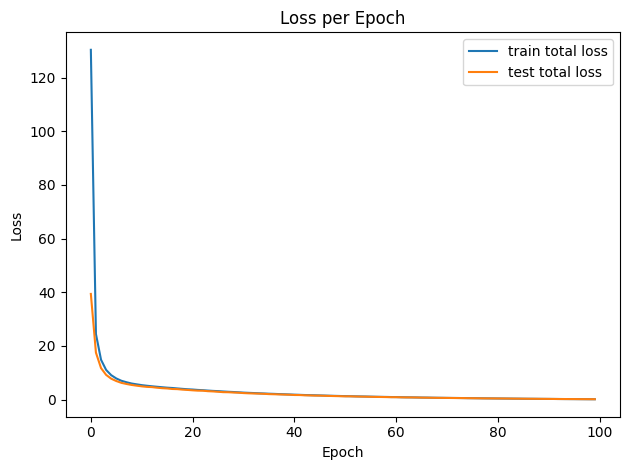

25
25
SIZE
25
208
5
5
SIZE
5
208
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  0.96
False possitive:  0.04
False negative:  1.0
True possitive:  0.2
True negative:  0.76
False possitive:  0.24
False negative:  0.8
In i=  1
Epoch 0/100,TRAIN Loss: 377.2234 - TEST Loss: 233.4708
Epoch 10/100,TRAIN Loss: 16.3735 - TEST Loss: 21.1506
Epoch 20/100,TRAIN Loss: 9.5088 - TEST Loss: 11.9012
Epoch 30/100,TRAIN Loss: 6.3134 - TEST Loss: 7.6963
Epoch 40/100,TRAIN Loss: 4.5771 - TEST Loss: 5.5371
Epoch 50/100,TRAIN Loss: 3.4978 - TEST Loss: 4.2043
Epoch 60/100,TRAIN Loss: 2.7656 - TEST Loss: 3.3

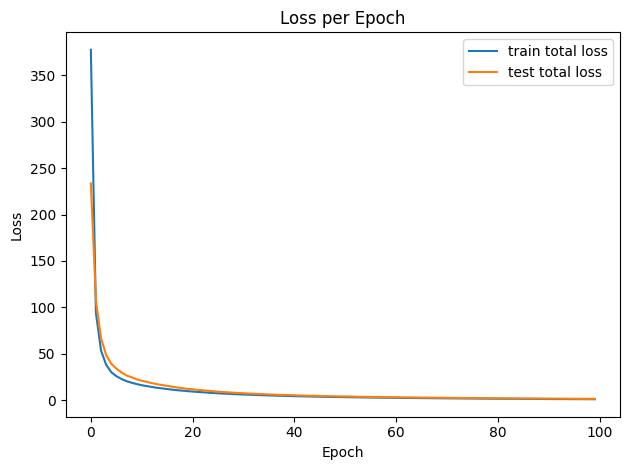

25
25
SIZE
25
208
5
5
SIZE
5
208
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  0.96
False possitive:  0.04
False negative:  1.0
True possitive:  0.2
True negative:  0.56
False possitive:  0.44
False negative:  0.8
In i=  2
Epoch 0/100,TRAIN Loss: 117.0894 - TEST Loss: 33.6811
Epoch 10/100,TRAIN Loss: 3.9186 - TEST Loss: 3.5672
Epoch 20/100,TRAIN Loss: 2.7147 - TEST Loss: 2.4778
Epoch 30/100,TRAIN Loss: 1.9222 - TEST Loss: 1.7476
Epoch 40/100,TRAIN Loss: 1.3498 - TEST Loss: 1.2412
Epoch 50/100,TRAIN Loss: 0.8995 - TEST Loss: 0.8179
Epoch 60/100,TRAIN Loss: 0.5053 - TEST Loss: 0.4624


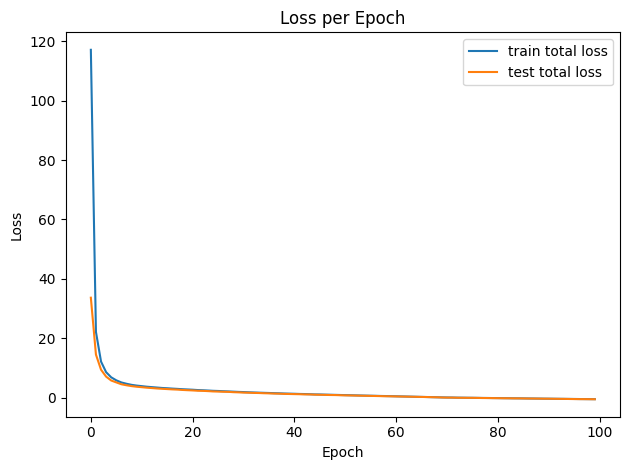

25
25
SIZE
25
208
5
5
SIZE
5
208
True possitive:  0.2
True negative:  1.0
False possitive:  0.0
False negative:  0.8
True possitive:  0.2
True negative:  1.0
False possitive:  0.0
False negative:  0.8
True possitive:  0.2
True negative:  1.0
False possitive:  0.0
False negative:  0.8
True possitive:  0.2
True negative:  1.0
False possitive:  0.0
False negative:  0.8
True possitive:  0.2
True negative:  1.0
False possitive:  0.0
False negative:  0.8
True possitive:  0.2
True negative:  0.84
False possitive:  0.16
False negative:  0.8
True possitive:  0.4
True negative:  0.4
False possitive:  0.6
False negative:  0.6
In i=  3
Epoch 0/100,TRAIN Loss: 183.8839 - TEST Loss: 47.6173
Epoch 10/100,TRAIN Loss: 4.0935 - TEST Loss: 4.8095
Epoch 20/100,TRAIN Loss: 3.1819 - TEST Loss: 3.8964
Epoch 30/100,TRAIN Loss: 2.5299 - TEST Loss: 3.1736
Epoch 40/100,TRAIN Loss: 1.9820 - TEST Loss: 2.5560
Epoch 50/100,TRAIN Loss: 1.5649 - TEST Loss: 2.0819
Epoch 60/100,TRAIN Loss: 1.1727 - TEST Loss: 1.6427
Ep

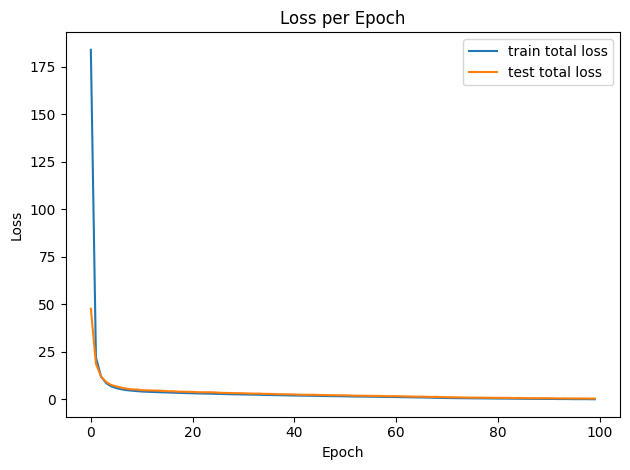

25
25
SIZE
25
208
5
5
SIZE
5
208
True possitive:  0.4
True negative:  1.0
False possitive:  0.0
False negative:  0.6
True possitive:  0.4
True negative:  1.0
False possitive:  0.0
False negative:  0.6
True possitive:  0.4
True negative:  1.0
False possitive:  0.0
False negative:  0.6
True possitive:  0.4
True negative:  1.0
False possitive:  0.0
False negative:  0.6
True possitive:  0.4
True negative:  1.0
False possitive:  0.0
False negative:  0.6
True possitive:  0.4
True negative:  0.68
False possitive:  0.32
False negative:  0.6
True possitive:  0.6
True negative:  0.36
False possitive:  0.64
False negative:  0.4
In i=  4
Epoch 0/100,TRAIN Loss: 283.8140 - TEST Loss: 85.8191
Epoch 10/100,TRAIN Loss: 6.3244 - TEST Loss: 5.5027
Epoch 20/100,TRAIN Loss: 4.5129 - TEST Loss: 3.8368
Epoch 30/100,TRAIN Loss: 3.4151 - TEST Loss: 2.9514
Epoch 40/100,TRAIN Loss: 2.6377 - TEST Loss: 2.2040
Epoch 50/100,TRAIN Loss: 2.0371 - TEST Loss: 1.6697
Epoch 60/100,TRAIN Loss: 1.5447 - TEST Loss: 1.2330


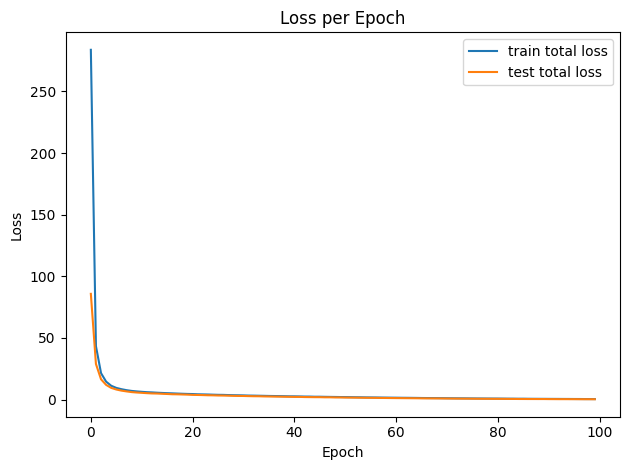

25
25
SIZE
25
208
5
5
SIZE
5
208
True possitive:  0.2
True negative:  1.0
False possitive:  0.0
False negative:  0.8
True possitive:  0.2
True negative:  1.0
False possitive:  0.0
False negative:  0.8
True possitive:  0.2
True negative:  1.0
False possitive:  0.0
False negative:  0.8
True possitive:  0.2
True negative:  1.0
False possitive:  0.0
False negative:  0.8
True possitive:  0.2
True negative:  1.0
False possitive:  0.0
False negative:  0.8
True possitive:  0.2
True negative:  1.0
False possitive:  0.0
False negative:  0.8
True possitive:  0.4
True negative:  0.72
False possitive:  0.28
False negative:  0.6
In i=  5
Epoch 0/100,TRAIN Loss: 173.7369 - TEST Loss: 58.6616
Epoch 10/100,TRAIN Loss: 6.4226 - TEST Loss: 7.2018
Epoch 20/100,TRAIN Loss: 4.4130 - TEST Loss: 4.9314
Epoch 30/100,TRAIN Loss: 3.1958 - TEST Loss: 3.6135
Epoch 40/100,TRAIN Loss: 2.2944 - TEST Loss: 2.5961
Epoch 50/100,TRAIN Loss: 1.5873 - TEST Loss: 1.8292
Epoch 60/100,TRAIN Loss: 1.0523 - TEST Loss: 1.2423
Ep

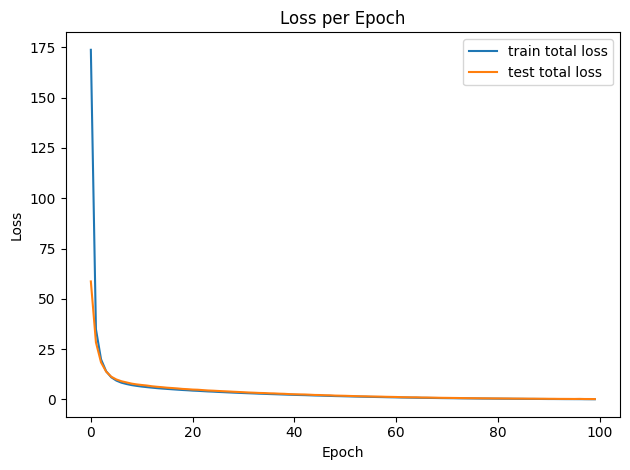

25
25
SIZE
25
208
5
5
SIZE
5
208
True possitive:  0.2
True negative:  1.0
False possitive:  0.0
False negative:  0.8
True possitive:  0.2
True negative:  1.0
False possitive:  0.0
False negative:  0.8
True possitive:  0.2
True negative:  1.0
False possitive:  0.0
False negative:  0.8
True possitive:  0.2
True negative:  1.0
False possitive:  0.0
False negative:  0.8
True possitive:  0.2
True negative:  1.0
False possitive:  0.0
False negative:  0.8
True possitive:  0.2
True negative:  0.84
False possitive:  0.16
False negative:  0.8
True possitive:  0.2
True negative:  0.68
False possitive:  0.32
False negative:  0.8
In i=  6
Epoch 0/100,TRAIN Loss: 244.4530 - TEST Loss: 77.1985
Epoch 10/100,TRAIN Loss: 8.9251 - TEST Loss: 9.8749
Epoch 20/100,TRAIN Loss: 6.9819 - TEST Loss: 7.7681
Epoch 30/100,TRAIN Loss: 5.6366 - TEST Loss: 6.3367
Epoch 40/100,TRAIN Loss: 4.4656 - TEST Loss: 5.0175
Epoch 50/100,TRAIN Loss: 3.7106 - TEST Loss: 4.3195
Epoch 60/100,TRAIN Loss: 3.1208 - TEST Loss: 3.8262


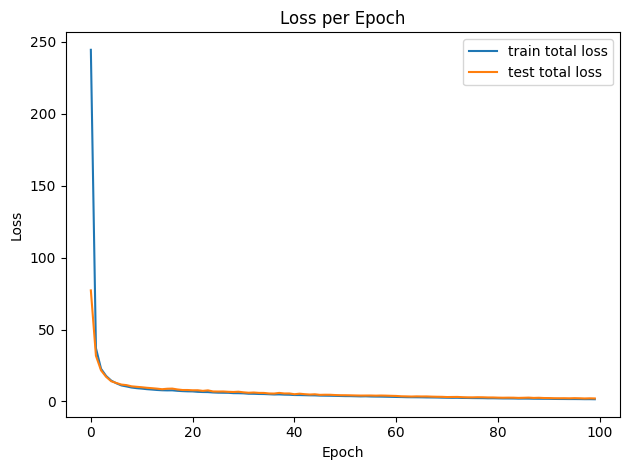

25
25
SIZE
25
208
5
5
SIZE
5
208
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  0.96
False possitive:  0.04
False negative:  1.0
True possitive:  0.0
True negative:  0.92
False possitive:  0.08
False negative:  1.0
True possitive:  0.0
True negative:  0.72
False possitive:  0.28
False negative:  1.0
In i=  7
Epoch 0/100,TRAIN Loss: 94.0143 - TEST Loss: 48.8420
Epoch 10/100,TRAIN Loss: 4.1427 - TEST Loss: 5.2385
Epoch 20/100,TRAIN Loss: 2.6323 - TEST Loss: 3.5142
Epoch 30/100,TRAIN Loss: 1.7673 - TEST Loss: 2.4349
Epoch 40/100,TRAIN Loss: 1.1266 - TEST Loss: 1.6585
Epoch 50/100,TRAIN Loss: 0.6634 - TEST Loss: 1.0976
Epoch 60/100,TRAIN Loss: 0.2815 - TEST Loss: 0.5925

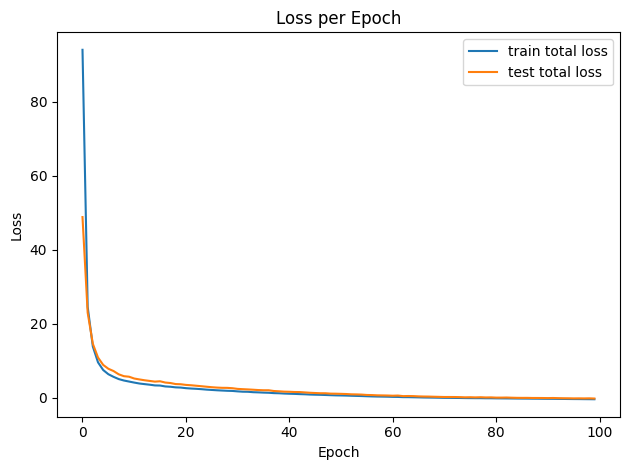

25
25
SIZE
25
208
5
5
SIZE
5
208
True possitive:  0.2
True negative:  1.0
False possitive:  0.0
False negative:  0.8
True possitive:  0.2
True negative:  1.0
False possitive:  0.0
False negative:  0.8
True possitive:  0.2
True negative:  1.0
False possitive:  0.0
False negative:  0.8
True possitive:  0.2
True negative:  1.0
False possitive:  0.0
False negative:  0.8
True possitive:  0.2
True negative:  1.0
False possitive:  0.0
False negative:  0.8
True possitive:  0.2
True negative:  1.0
False possitive:  0.0
False negative:  0.8
True possitive:  0.2
True negative:  0.72
False possitive:  0.28
False negative:  0.8
In i=  8
Epoch 0/100,TRAIN Loss: 132.1874 - TEST Loss: 33.3947
Epoch 10/100,TRAIN Loss: 2.7765 - TEST Loss: 2.4101
Epoch 20/100,TRAIN Loss: 1.7058 - TEST Loss: 1.5098
Epoch 30/100,TRAIN Loss: 1.0516 - TEST Loss: 0.9637
Epoch 40/100,TRAIN Loss: 0.5923 - TEST Loss: 0.5587
Epoch 50/100,TRAIN Loss: 0.2209 - TEST Loss: 0.2459
Epoch 60/100,TRAIN Loss: -0.1506 - TEST Loss: -0.1880


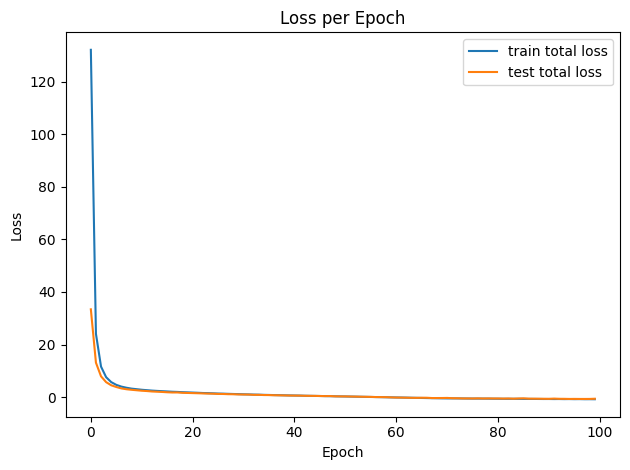

25
25
SIZE
25
208
5
5
SIZE
5
208
True possitive:  0.4
True negative:  1.0
False possitive:  0.0
False negative:  0.6
True possitive:  0.4
True negative:  0.96
False possitive:  0.04
False negative:  0.6
True possitive:  0.4
True negative:  0.96
False possitive:  0.04
False negative:  0.6
True possitive:  0.4
True negative:  0.96
False possitive:  0.04
False negative:  0.6
True possitive:  0.4
True negative:  0.96
False possitive:  0.04
False negative:  0.6
True possitive:  0.4
True negative:  0.96
False possitive:  0.04
False negative:  0.6
True possitive:  0.6
True negative:  0.56
False possitive:  0.44
False negative:  0.4
In i=  9
Epoch 0/100,TRAIN Loss: 179.6781 - TEST Loss: 60.8403
Epoch 10/100,TRAIN Loss: 4.9626 - TEST Loss: 5.0238
Epoch 20/100,TRAIN Loss: 3.4524 - TEST Loss: 3.4823
Epoch 30/100,TRAIN Loss: 2.4108 - TEST Loss: 2.4349
Epoch 40/100,TRAIN Loss: 1.6546 - TEST Loss: 1.6566
Epoch 50/100,TRAIN Loss: 1.1190 - TEST Loss: 1.1703
Epoch 60/100,TRAIN Loss: 0.5851 - TEST Loss:

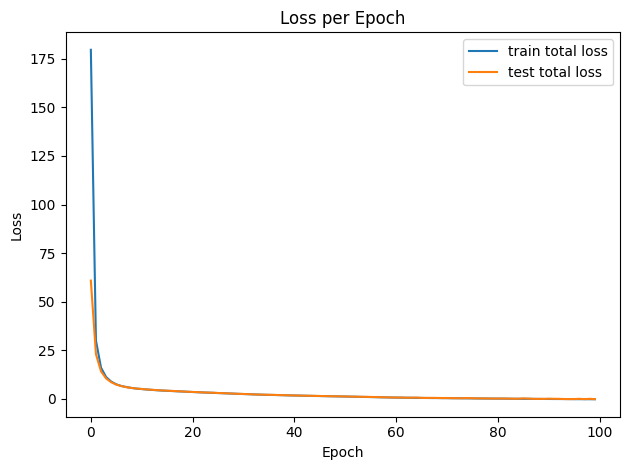

25
25
SIZE
25
208
5
5
SIZE
5
208
True possitive:  0.4
True negative:  1.0
False possitive:  0.0
False negative:  0.6
True possitive:  0.4
True negative:  1.0
False possitive:  0.0
False negative:  0.6
True possitive:  0.4
True negative:  1.0
False possitive:  0.0
False negative:  0.6
True possitive:  0.4
True negative:  1.0
False possitive:  0.0
False negative:  0.6
True possitive:  0.4
True negative:  1.0
False possitive:  0.0
False negative:  0.6
True possitive:  0.4
True negative:  0.8
False possitive:  0.2
False negative:  0.6
True possitive:  0.8
True negative:  0.52
False possitive:  0.48
False negative:  0.2

Results after 10 model trains
_____________________________
For threshold =  0.01
True possitive:  0.2
False possitive:  0.0
True negative:  1.0
False negative:  0.7999999999999999
For threshold =  0.1
True possitive:  0.2
False possitive:  0.004
True negative:  0.9960000000000001
False negative:  0.7999999999999999
For threshold =  0.5
True possitive:  0.2
False possitive:

In [110]:
input_dim = len(prep_data[0])
hidden_dim1 = 400
hidden_dim2 = 200
hidden_dim3 = 30
latent_dim = 3
n_gmm = 5
lr = 1e-4
epochs = 100
lambda_energy=0.1
lambda_cov_diag=0.005
batch_size = 40

true_pos_arr=[[],[],[],[],[],[],[]]
false_pos_arr=[[],[],[],[],[],[],[]]
true_neg_arr=[[],[],[],[],[],[],[]]
false_neg_arr=[[],[],[],[],[],[],[]]

def mean(lst):
    if not lst:
        return None  # Handle empty list case
    return sum(lst) / len(lst)

def stats(example, attack, threshold):
  res=[]
  for thres in threshold:
    false_pos=len(torch.where(example >= thres)[0])/len(example)
    true_pos=len(torch.where(attack >= thres)[0])/len(attack)
    false_neg=len(torch.where(attack < thres)[0])/len(attack)
    true_neg=len(torch.where(example < thres)[0])/len(example)
    res.append([true_pos, true_neg, false_pos, false_neg])

  return res



def train_model(model, prep_data, optimizer, epochs):
  train_data, test_data = train_test_split(torch.tensor(prep_data, dtype=torch.float), test_size=0.25)
  train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=False)
  test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)


  losses = train(model, train_loader, test_loader, optimizer, epochs)
  plot_losses(losses)
  model.eval()  # Set the model to evaluation mode
  with torch.no_grad():
    train_energy = model.get_energy(train_data)
    test_energy = model.get_energy(test_data)

    all_energy=np.concatenate((train_energy, test_energy), axis=0)

    threshold = [np.percentile(all_energy, 99.99),np.percentile(all_energy, 99.9),np.percentile(all_energy, 99.5),np.percentile(all_energy, 99),np.percentile(all_energy, 95),np.percentile(all_energy, 90),np.percentile(all_energy, 75)]

    with open('testdata6.json', 'r') as f:
      data = json.load(f)

    example_dataset=data
    exam1 = preprocess(example_dataset)
    exam_fin, _=encode(exam1, maxL)
    exam = torch.tensor(exam_fin, dtype=torch.float)
    res2=model.get_energy(exam)
    example = res2.detach()
    with open('attackdata.json', 'r') as f:
      data = json.load(f)
    anomally_dataset=data
    anom1 = preprocess(anomally_dataset)
    anom_fin,_=encode(anom1, maxL)
    anom = torch.tensor(anom_fin, dtype=torch.float)
    res1=model.get_energy(anom)
    attack = res1.detach()

    ftpn=stats(example, attack, threshold)
    return ftpn
i=0
while(i<10):
  print("In i= ", i)
  model = DAGMM(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim, n_gmm)
  optimizer = optim.Adam(model.parameters(), lr=lr)
  results = train_model(model, prep_data, optimizer, epochs)
  count=0
  for res in results:
    print("True possitive: ", res[0])
    print("True negative: ", res[1])
    print("False possitive: ", res[2])
    print("False negative: ", res[3])
    true_pos_arr[count].append(res[0])
    true_neg_arr[count].append(res[1])
    false_pos_arr[count].append(res[2])
    false_neg_arr[count].append(res[3])
    count+=1
  i+=1
thresholds=[0.01, 0.1, 0.5, 1, 5, 10, 25]
print()
print("Results after 10 model trains")
print("_____________________________")
count=0
for tr in thresholds:
  print("For threshold = ", tr)
  print("True possitive: ", mean(true_pos_arr[count]))
  print("False possitive: ", mean(false_pos_arr[count]))
  print("True negative: ", mean(true_neg_arr[count]))
  print("False negative: ", mean(false_neg_arr[count]))
  count+=1




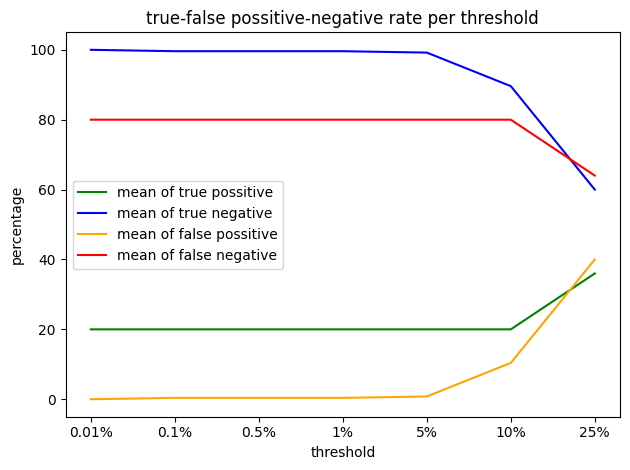

In [111]:
  mtp=[]
  mfp=[]
  mtn=[]
  mfn=[]
  t=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
  count=0
  for tr in thresholds:
    mtp.append(mean(true_pos_arr[count])*100)
    mtn.append(mean(true_neg_arr[count])*100)
    mfp.append(mean(false_pos_arr[count])*100)
    mfn.append(mean(false_neg_arr[count])*100)
    count+=1

  plt.plot(t, mtp, label="mean of true possitive", c='green')
  plt.plot(t, mtn, label="mean of true negative", c='blue')
  plt.plot(t, mfp, label="mean of false possitive", c='orange')
  plt.plot(t, mfn, label="mean of false negative", c='red')
  plt.title('true-false possitive-negative rate per threshold')
  plt.xlabel('threshold')
  plt.ylabel('percentage')
  plt.legend()
  plt.tight_layout()
  # plt.ylim(loss_data[1][len(loss_data[0])-1]-2,loss_data[1][len(loss_data[0])-1]+2)
  plt.show()


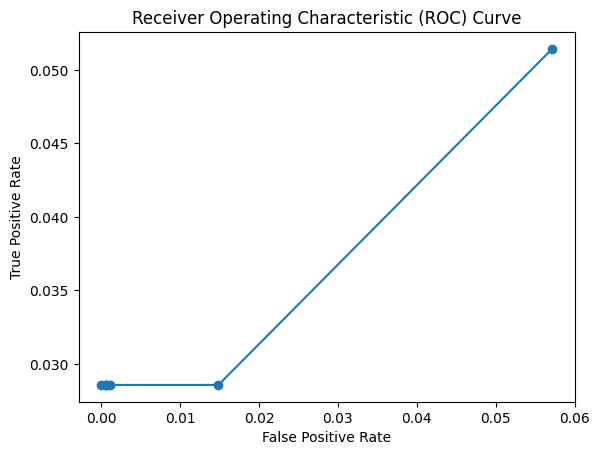

In [114]:

total_positives = sum(mtp) + sum(mfn)
total_negatives = sum(mtn) + sum(mfp)

# Calculate TPR and FPR
TPR = [tp / total_positives for tp in mtp]
FPR = [fp / total_negatives for fp in mfp]

# Plotting the ROC curve
plt.plot(FPR, TPR, marker='o')


# Adding labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Displaying the plot
plt.show()

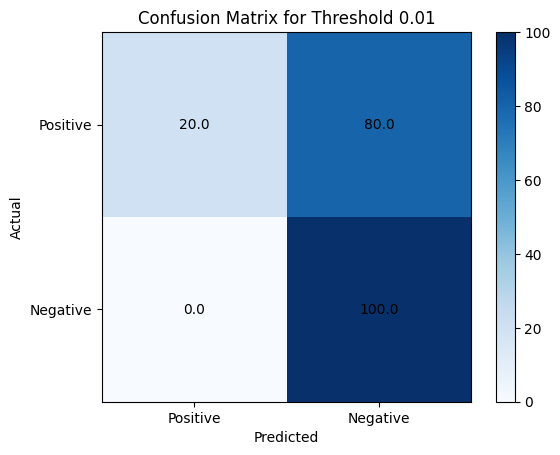

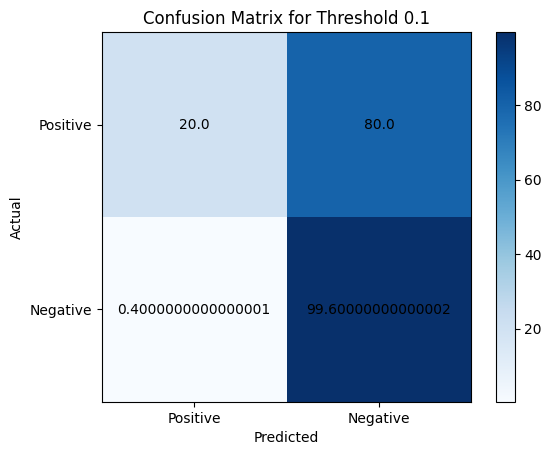

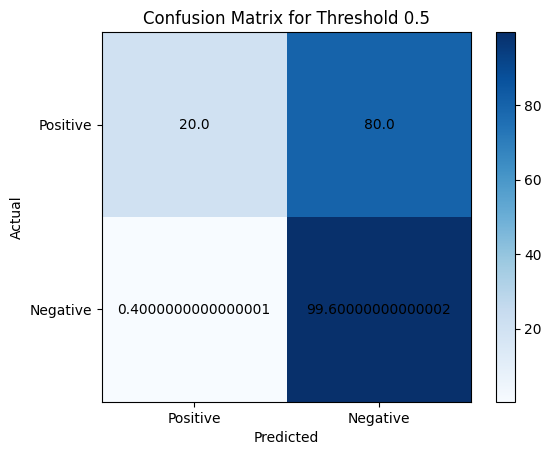

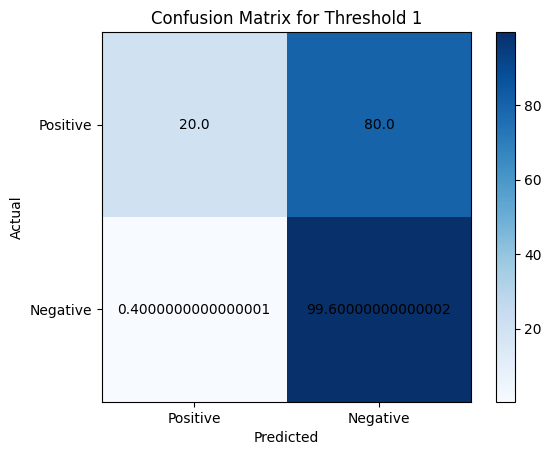

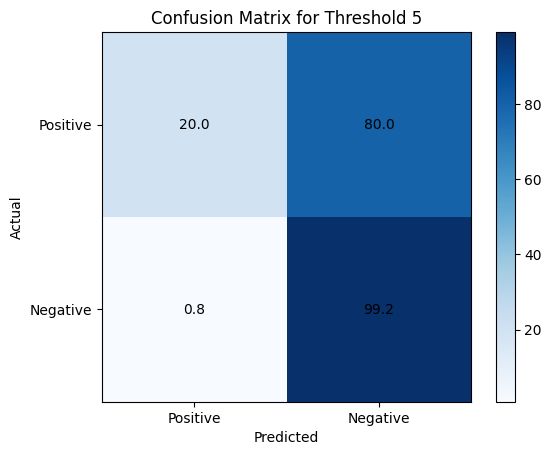

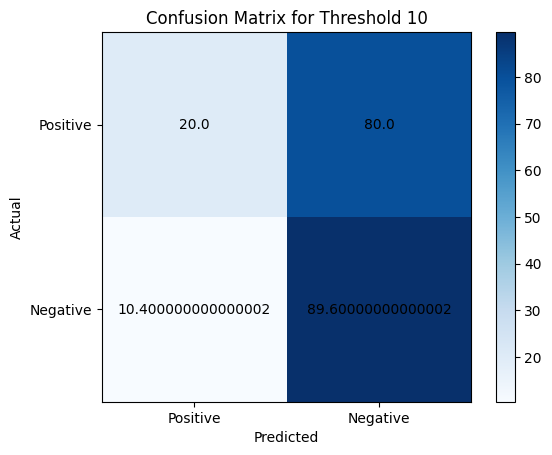

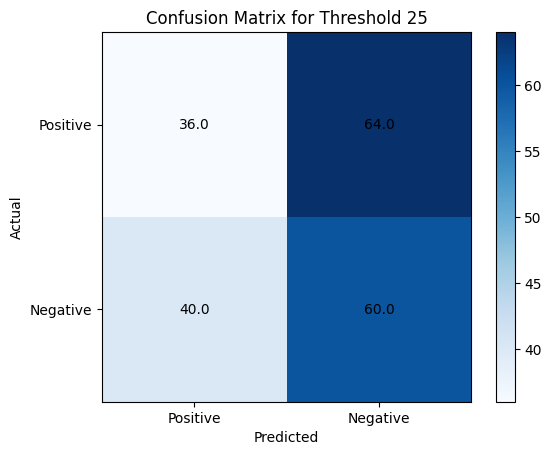

In [115]:
# Sample percentages of TP, TN, FP, FN for different thresholds


for i, threshold in enumerate(thresholds):

    total_positives = mtp[i] + mfn[i]
    total_negatives = mtn[i] + mfp[i]

    # Calculate TP, TN, FP, FN
    TP = mtp[i] / 100 * total_positives
    TN = mtn[i] / 100 * total_negatives
    FP = mfp[i] / 100 * total_negatives
    FN = mfn[i] / 100 * total_positives

    # Creating confusion matrix
    confusion_matrix = np.array([[TP, FN], [FP, TN]])

    # Plotting the confusion matrix
    plt.figure()
    plt.imshow(confusion_matrix, cmap=plt.cm.Blues, interpolation='nearest')
    plt.colorbar()

    # Adding labels
    plt.title(f'Confusion Matrix for Threshold {threshold}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.xticks([0, 1], ['Positive', 'Negative'])
    plt.yticks([0, 1], ['Positive', 'Negative'])

    # Displaying the plot
    for i in range(len(confusion_matrix)):
        for j in range(len(confusion_matrix[0])):
            plt.text(j, i, str(confusion_matrix[i, j]), va='center', ha='center')

plt.show()


###Isolation Forest


0.002686442822069872
[-0.03486177]
tensor([-0.0349], dtype=torch.float64)


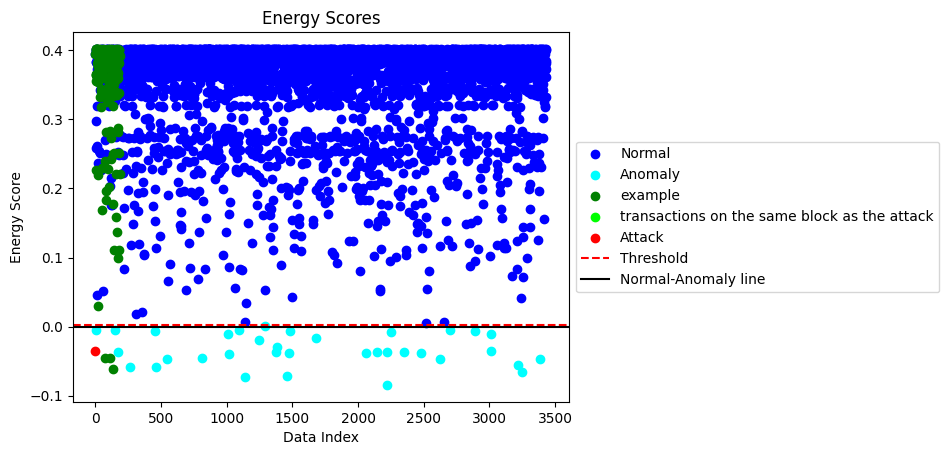

Found you
number of transactions with energy greater or equal to the attack in train is:  16  out of:  2575
number of transactions with energy greater or equal to the attack in test is:  5  out of:  859
number of transactions with energy greater or equal to the attack in example is:  3  out of:  186


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

# Assuming prep_data is your dataset
# Splitting data into train and test sets
train_data, test_data = train_test_split(torch.tensor(prep_data, dtype=torch.float), test_size=0.25, random_state=40)

# Parameters
batch_size = 64

# Extracting numpy arrays from torch tensors
train_array = train_data.numpy()
test_array = test_data.numpy()



# Create Isolation Forest model
clf = IsolationForest(contamination=0.01, max_samples='auto', max_features = 1000 , n_estimators=1000, bootstrap=False)

# Fit the model on training data
clf.fit(train_array)

# Get anomaly scores for test data
test_energy=clf.decision_function(test_array)
train_energy=clf.decision_function(train_array)
all_energy=np.concatenate((train_energy, test_energy), axis=0)

# Determine anomalies
threshold = np.percentile(all_energy, 1)
print(threshold)




normal_energy=torch.cat((torch.tensor(train_energy), torch.tensor(test_energy)), dim=0)

normal_indices = torch.where(normal_energy > threshold)[0]
anomaly_indices = torch.where(normal_energy <= threshold)[0]
attack = torch.tensor(clf.decision_function(anom.numpy()))
example = torch.tensor(clf.decision_function(exam.numpy()))

print(clf.decision_function(anom.numpy()))


plt.scatter(normal_indices, normal_energy[normal_indices], c='blue', label='Normal')
plt.scatter(anomaly_indices, normal_energy[anomaly_indices], c='cyan', label='Anomaly')
print(attack)

plt.scatter(range(len(example)), example, c='green', label='example')


plt.scatter(range(len(attack[1:3])), attack[1:3], c='lime', label='transactions on the same block as the attack')
plt.scatter(range(1), attack[0], c='red', label='Attack')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.axhline(y=0, color='black', linestyle='-', label='Normal-Anomaly line')
plt.title('Energy Scores')
plt.xlabel('Data Index')
plt.ylabel('Energy Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

if(attack[0]<threshold):
  print("Found you")
else:
  print("try again")



print("number of transactions with energy greater or equal to the attack in train is: ", len(torch.where(torch.tensor(train_energy) <= attack[0])[0]), " out of: ", len(train_energy))
print("number of transactions with energy greater or equal to the attack in test is: ", len(torch.where(torch.tensor(test_energy) <= attack[0])[0]), " out of: ", len(test_energy))
print("number of transactions with energy greater or equal to the attack in example is: ", len(torch.where(example <= attack[0])[0]), " out of: ", len(example))



###One class SVM

-0.00035191303357794633
[-1]
[0.00045329]
tensor([-1.0155], dtype=torch.float64)


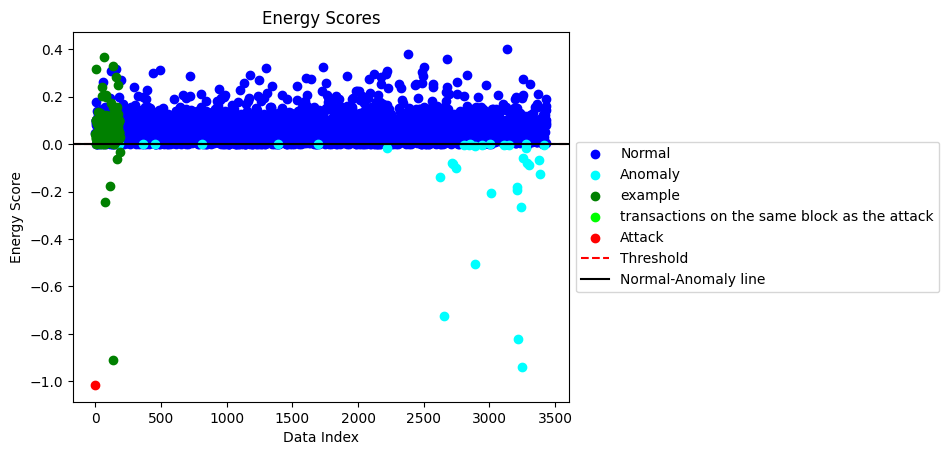

Found you
number of transactions with energy greater or equal to the attack in train is:  0  out of:  2575
number of transactions with energy greater or equal to the attack in test is:  0  out of:  859
number of transactions with energy greater or equal to the attack in example is:  0  out of:  186


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split

# Assuming prep_data is your dataset
# Splitting data into train and test sets
train_data, test_data = train_test_split(prep_data, test_size=0.25, random_state=40)

# Create One-Class SVM model
clf = OneClassSVM(nu=0.01, kernel="rbf", gamma=0.1)  # You can adjust the nu parameter as needed

# Fit the model on training data
clf.fit(train_data)

# Get anomaly scores for test data
train_energy=clf.decision_function(train_data)
test_energy=clf.decision_function(test_data)
all_energy=np.concatenate((train_energy, test_energy), axis=0)

# Determine anomalies
threshold  = np.percentile(all_energy, 1)
print(threshold)

print(clf.predict(anom.numpy()))


normal_energy=torch.cat((torch.tensor(train_energy), torch.tensor(test_energy)), dim=0)

normal_indices = torch.where(normal_energy > threshold)[0]
anomaly_indices = torch.where(normal_energy <= threshold)[0]
attack = torch.tensor(clf.decision_function(anom.numpy()))
example = torch.tensor(clf.decision_function(exam.numpy()))

print(clf.score_samples(anom.numpy()))


plt.scatter(normal_indices, normal_energy[normal_indices], c='blue', label='Normal')
plt.scatter(anomaly_indices, normal_energy[anomaly_indices], c='cyan', label='Anomaly')
print(attack)

plt.scatter(range(len(example)), example, c='green', label='example')


plt.scatter(range(len(attack[1:3])), attack[1:3], c='lime', label='transactions on the same block as the attack')
plt.scatter(range(1), attack[0], c='red', label='Attack')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.axhline(y=0, color='black', linestyle='-', label='Normal-Anomaly line')
plt.title('Energy Scores')
plt.xlabel('Data Index')
plt.ylabel('Energy Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()

if(attack[0]<threshold):
  print("Found you")
else:
  print("try again")




print("number of transactions with energy greater or equal to the attack in train is: ", len(torch.where(torch.tensor(train_energy) <= attack[0])[0]), " out of: ", len(train_energy))
print("number of transactions with energy greater or equal to the attack in test is: ", len(torch.where(torch.tensor(test_energy) <= attack[0])[0]), " out of: ", len(test_energy))
print("number of transactions with energy greater or equal to the attack in example is: ", len(torch.where(example <= attack[0])[0]), " out of: ", len(example))




###SGD One Class SVM

0.20674452724946368
[1]
[4.5927926]
tensor([1.6152], dtype=torch.float64)


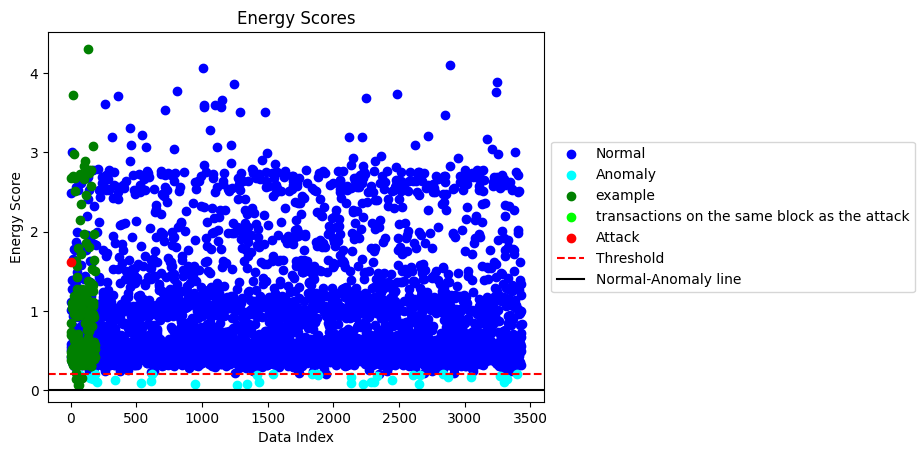

try again
number of transactions with energy greater or equal to the attack in train is:  2127  out of:  2575
number of transactions with energy greater or equal to the attack in test is:  731  out of:  859
number of transactions with energy greater or equal to the attack in example is:  157  out of:  186


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDOneClassSVM
from sklearn.model_selection import train_test_split

# Assuming prep_data is your dataset
# Splitting data into train and test sets
train_data, test_data = train_test_split(prep_data, test_size=0.25, random_state=40)

# Create One-Class SVM model
clf = SGDOneClassSVM(nu=0.01, learning_rate='optimal', average=True)  # You can adjust the nu parameter as needed

# Fit the model on training data
train_energy=clf.fit(train_data)

# Get anomaly scores for test data
train_energy=clf.decision_function(train_data)
test_energy=clf.decision_function(test_data)
all_energy=np.concatenate((train_energy, test_energy), axis=0)

# Determine anomalies
threshold  = np.percentile(all_energy, 1)
print(threshold)

print(clf.predict(anom.numpy()))


normal_energy=torch.cat((torch.tensor(train_energy), torch.tensor(test_energy)), dim=0)

normal_indices = torch.where(normal_energy > threshold)[0]
anomaly_indices = torch.where(normal_energy <= threshold)[0]
attack = torch.tensor(clf.decision_function(anom.numpy()))
example = torch.tensor(clf.decision_function(exam.numpy()))

print(clf.score_samples(anom.numpy()))


plt.scatter(normal_indices, normal_energy[normal_indices], c='blue', label='Normal')
plt.scatter(anomaly_indices, normal_energy[anomaly_indices], c='cyan', label='Anomaly')
print(attack)

plt.scatter(range(len(example)), example, c='green', label='example')


plt.scatter(range(len(attack[1:3])), attack[1:3], c='lime', label='transactions on the same block as the attack')
plt.scatter(range(1), attack[0], c='red', label='Attack')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.axhline(y=0, color='black', linestyle='-', label='Normal-Anomaly line')
plt.title('Energy Scores')
plt.xlabel('Data Index')
plt.ylabel('Energy Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()

if(attack[0]<threshold):
  print("Found you")
else:
  print("try again")




print("number of transactions with energy greater or equal to the attack in train is: ", len(torch.where(torch.tensor(train_energy) <= attack[0])[0]), " out of: ", len(train_energy))
print("number of transactions with energy greater or equal to the attack in test is: ", len(torch.where(torch.tensor(test_energy) <= attack[0])[0]), " out of: ", len(test_energy))
print("number of transactions with energy greater or equal to the attack in example is: ", len(torch.where(example <= attack[0])[0]), " out of: ", len(example))




###Autoencoder

Epoch [10/200], Train Loss: 0.0101, Test Loss: 0.0091
Epoch [20/200], Train Loss: 0.0080, Test Loss: 0.0072
Epoch [30/200], Train Loss: 0.0068, Test Loss: 0.0061
Epoch [40/200], Train Loss: 0.0062, Test Loss: 0.0056
Epoch [50/200], Train Loss: 0.0059, Test Loss: 0.0054
Epoch [60/200], Train Loss: 0.0058, Test Loss: 0.0053
Epoch [70/200], Train Loss: 0.0058, Test Loss: 0.0053
Epoch [80/200], Train Loss: 0.0058, Test Loss: 0.0053
Epoch [90/200], Train Loss: 0.0058, Test Loss: 0.0053
Epoch [100/200], Train Loss: 0.0058, Test Loss: 0.0053
Epoch [110/200], Train Loss: 0.0058, Test Loss: 0.0053
Epoch [120/200], Train Loss: 0.0058, Test Loss: 0.0053
Epoch [130/200], Train Loss: 0.0058, Test Loss: 0.0053
Epoch [140/200], Train Loss: 0.0058, Test Loss: 0.0053
Epoch [150/200], Train Loss: 0.0058, Test Loss: 0.0053
Epoch [160/200], Train Loss: 0.0058, Test Loss: 0.0053
Epoch [170/200], Train Loss: 0.0058, Test Loss: 0.0053
Epoch [180/200], Train Loss: 0.0058, Test Loss: 0.0053
Epoch [190/200], Tr

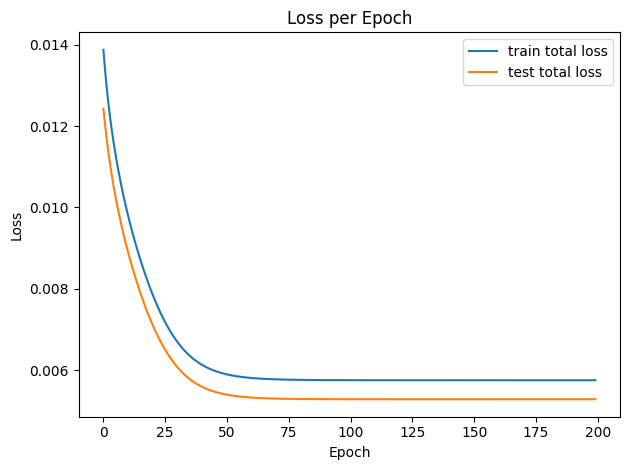

0.04575986847281457


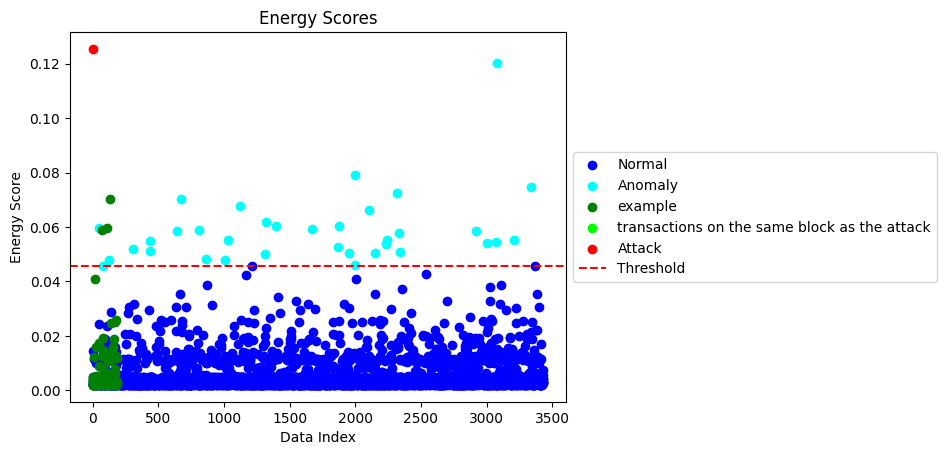

Found you
number of transactions with energy greater or equal to the attack in train is:  0  out of:  859
number of transactions with energy greater or equal to the attack in test is:  0  out of:  2575
number of transactions with energy greater or equal to the attack in example is:  0  out of:  186


In [ ]:
import torch.nn as nn

class AE(nn.Module):
    def __init__(self, input_dim):
        super(AE, self).__init__()
        self.enc = nn.Sequential(
            nn.Linear(input_dim, 400),
            nn.Tanh(),
            nn.Linear(400, 200),
            nn.Tanh(),
            nn.Linear(200, 100),
            nn.Tanh(),
            nn.Linear(100, 50),
            nn.Tanh(),
            nn.Linear(50, 25),
            nn.Tanh(),
            nn.Linear(25, 12),
        )
        self.dec = nn.Sequential(
            nn.Linear(12, 25),
            nn.Tanh(),
            nn.Linear(25, 50),
            nn.Tanh(),
            nn.Linear(50, 100),
            nn.Tanh(),
            nn.Linear(100, 200),
            nn.Tanh(),
            nn.Linear(200, 400),
            nn.Tanh(),
            nn.Linear(400, input_dim),
        )
    def forward(self, x):
        encode = self.enc(x)
        decode = self.dec(encode)
        return decode

lr = 5.0         # learning rate
w_d = 1e-4        # weight decay
epochs = 200

prep_data_tensor = torch.tensor(prep_data, dtype=torch.float32)
train_data, test_data = train_test_split(prep_data_tensor, test_size=0.25, random_state=40)
input_dim = prep_data_tensor.shape[1]
model = AE(input_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=w_d)

train_losses = []
test_losses = []
for epoch in range(epochs):
    # Forward pass and compute training loss
    model.train()
    sample = model(train_data)
    train_loss = criterion(train_data, sample)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Compute testing loss
    model.eval()
    with torch.no_grad():
        test_outputs = model(test_data)
        test_loss = criterion(test_outputs, test_data)

    # Print progress and store losses
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')
    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())

plot_losses([train_losses, test_losses])

def reconstruction_loss(input_data, output_data):
    return torch.mean((input_data - output_data)**2, axis=1)


# Calculate reconstruction error for each data point in the test set
def get_energy(data):
  with torch.no_grad():
      reconstructed_data = model(data)
      reconstruction_errors = reconstruction_loss(data, reconstructed_data).detach().numpy()
  return reconstruction_errors

# Get anomaly scores for test data
test_energy=get_energy(train_data)
train_energy=get_energy(test_data)
all_energy=np.concatenate((train_energy, test_energy), axis=0)

# Determine anomalies
threshold = np.percentile(all_energy, 100-1)
print(threshold)




normal_energy=torch.cat((torch.tensor(train_energy), torch.tensor(test_energy)), dim=0)

normal_indices = torch.where(normal_energy < threshold)[0]
anomaly_indices = torch.where(normal_energy >= threshold)[0]
attack = torch.tensor(get_energy(anom))
example = torch.tensor(get_energy(exam))




plt.scatter(normal_indices, normal_energy[normal_indices], c='blue', label='Normal')
plt.scatter(anomaly_indices, normal_energy[anomaly_indices], c='cyan', label='Anomaly')


plt.scatter(range(len(example)), example, c='green', label='example')


plt.scatter(range(len(attack[1:3])), attack[1:3], c='lime', label='transactions on the same block as the attack')
plt.scatter(range(1), attack[0], c='red', label='Attack')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.title('Energy Scores')
plt.xlabel('Data Index')
plt.ylabel('Energy Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
if(attack[0]>=threshold):
  print("Found you")
else:
  print("try again")


print("number of transactions with energy greater or equal to the attack in train is: ", len(torch.where(torch.tensor(train_energy) >= attack[0])[0]), " out of: ", len(train_energy))
print("number of transactions with energy greater or equal to the attack in test is: ", len(torch.where(torch.tensor(test_energy) >= attack[0])[0]), " out of: ", len(test_energy))
print("number of transactions with energy greater or equal to the attack in example is: ", len(torch.where(example >= attack[0])[0]), " out of: ", len(example))




###Recursive Autoencoder

1042
Epoch [10/200], Train Loss: 0.0064, Test Loss: 0.0057
Epoch [20/200], Train Loss: 0.0053, Test Loss: 0.0048
Epoch [30/200], Train Loss: 0.0044, Test Loss: 0.0041
Epoch [40/200], Train Loss: 0.0038, Test Loss: 0.0036
Epoch [50/200], Train Loss: 0.0035, Test Loss: 0.0033
Epoch [60/200], Train Loss: 0.0032, Test Loss: 0.0030
Epoch [70/200], Train Loss: 0.0028, Test Loss: 0.0026
Epoch [80/200], Train Loss: 0.0025, Test Loss: 0.0023
Epoch [90/200], Train Loss: 0.0023, Test Loss: 0.0021
Epoch [100/200], Train Loss: 0.0021, Test Loss: 0.0019
Epoch [110/200], Train Loss: 0.0020, Test Loss: 0.0018
Epoch [120/200], Train Loss: 0.0019, Test Loss: 0.0017
Epoch [130/200], Train Loss: 0.0017, Test Loss: 0.0016
Epoch [140/200], Train Loss: 0.0017, Test Loss: 0.0015
Epoch [150/200], Train Loss: 0.0016, Test Loss: 0.0015
Epoch [160/200], Train Loss: 0.0015, Test Loss: 0.0014
Epoch [170/200], Train Loss: 0.0014, Test Loss: 0.0013
Epoch [180/200], Train Loss: 0.0013, Test Loss: 0.0012
Epoch [190/200

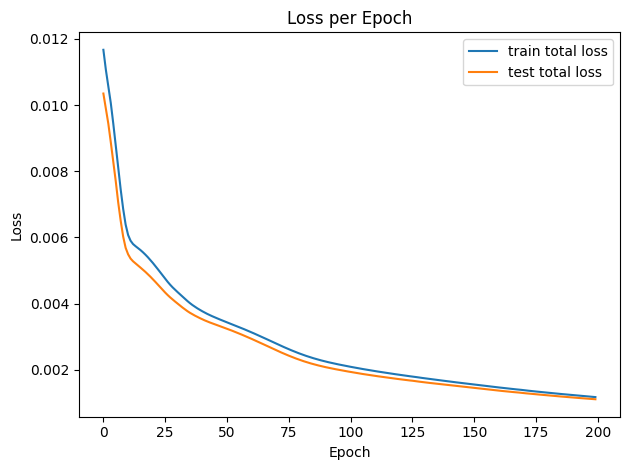

0.009700267547741535


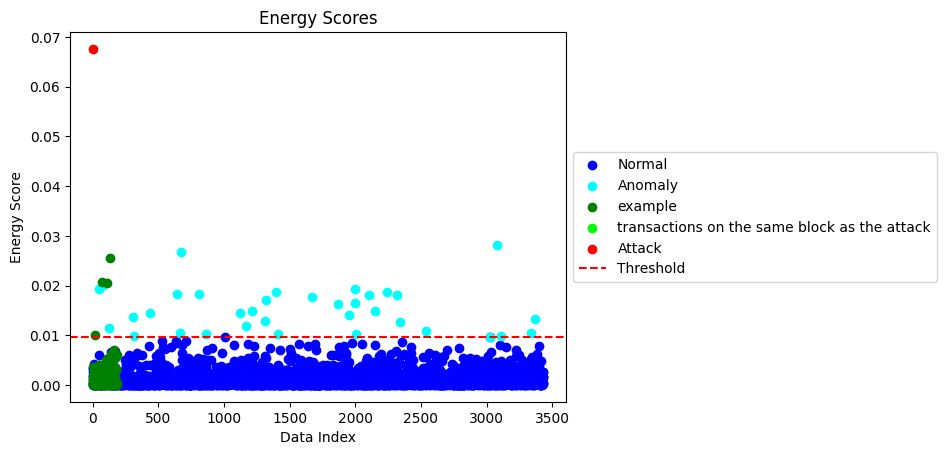

Found you
number of transactions with energy greater or equal to the attack in train is:  0  out of:  859
number of transactions with energy greater or equal to the attack in test is:  0  out of:  2575
number of transactions with energy greater or equal to the attack in example is:  0  out of:  186


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class LSTMAutoencoder(nn.Module):
  def __init__(self, input_dim, hidden_dim):
    super(LSTMAutoencoder, self).__init__()
    self.encoder = nn.LSTM(input_dim, hidden_dim, num_layers=1, batch_first=True)
    self.decoder = nn.LSTM(hidden_dim, input_dim, num_layers=1, batch_first=True)

  def forward(self, x):
    encoded, (h_n, c_n) = self.encoder(x)
    decoded, _ = self.decoder(encoded)
    return encoded, decoded


# Function to calculate reconstruction loss for each data point separately
def reconstruction_loss(input_data, output_data):
    return torch.mean((input_data - output_data[1])**2, axis=1)


# Prepare data (assuming prep_data is your dataset)
prep_data_tensor = torch.tensor(prep_data, dtype=torch.float32)

# Split data into train and test sets
train_data, test_data = train_test_split(prep_data_tensor, test_size=0.25, random_state=40)

# Parameters
input_dim = prep_data_tensor.shape[1]  # Input dimension
print(input_dim)
num_epochs = 200
learning_rate = 1e-3

# Initialize the autoencoder model
model = LSTMAutoencoder(input_dim, 128)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the autoencoder
train_losses = []
test_losses = []

# Training the autoencoder
for epoch in range(num_epochs):
    # Forward pass and compute training loss
    model.train()
    outputs = model(train_data)[1]
    train_loss = criterion(outputs, train_data)

    # Backward pass and optimization
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Compute testing loss
    model.eval()
    with torch.no_grad():
        test_outputs = model(test_data)[1]
        test_loss = criterion(test_outputs, test_data)

    # Print progress and store losses
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')
    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())

plot_losses([train_losses, test_losses])

# Calculate reconstruction error for each data point in the test set
def get_energy(data):
  with torch.no_grad():
      reconstructed_data = model(data)
      reconstruction_errors = reconstruction_loss(data, reconstructed_data).detach().numpy()
  return reconstruction_errors

# Get anomaly scores for test data
test_energy=get_energy(train_data)
train_energy=get_energy(test_data)
all_energy=np.concatenate((train_energy, test_energy), axis=0)

# Determine anomalies
threshold = np.percentile(all_energy, 100-1)
print(threshold)




normal_energy=torch.cat((torch.tensor(train_energy), torch.tensor(test_energy)), dim=0)

normal_indices = torch.where(normal_energy < threshold)[0]
anomaly_indices = torch.where(normal_energy >= threshold)[0]
attack = torch.tensor(get_energy(anom))
example = torch.tensor(get_energy(exam))




plt.scatter(normal_indices, normal_energy[normal_indices], c='blue', label='Normal')
plt.scatter(anomaly_indices, normal_energy[anomaly_indices], c='cyan', label='Anomaly')


plt.scatter(range(len(example)), example, c='green', label='example')


plt.scatter(range(len(attack[1:3])), attack[1:3], c='lime', label='transactions on the same block as the attack')
plt.scatter(range(1), attack[0], c='red', label='Attack')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.title('Energy Scores')
plt.xlabel('Data Index')
plt.ylabel('Energy Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
if(attack[0]>=threshold):
  print("Found you")
else:
  print("try again")


print("number of transactions with energy greater or equal to the attack in train is: ", len(torch.where(torch.tensor(train_energy) >= attack[0])[0]), " out of: ", len(train_energy))
print("number of transactions with energy greater or equal to the attack in test is: ", len(torch.where(torch.tensor(test_energy) >= attack[0])[0]), " out of: ", len(test_energy))
print("number of transactions with energy greater or equal to the attack in example is: ", len(torch.where(example >= attack[0])[0]), " out of: ", len(example))



###Gaussian Mixture Model

4322.8652955542675
[-24433986.2263816]
tensor([-24433986.2264], dtype=torch.float64)


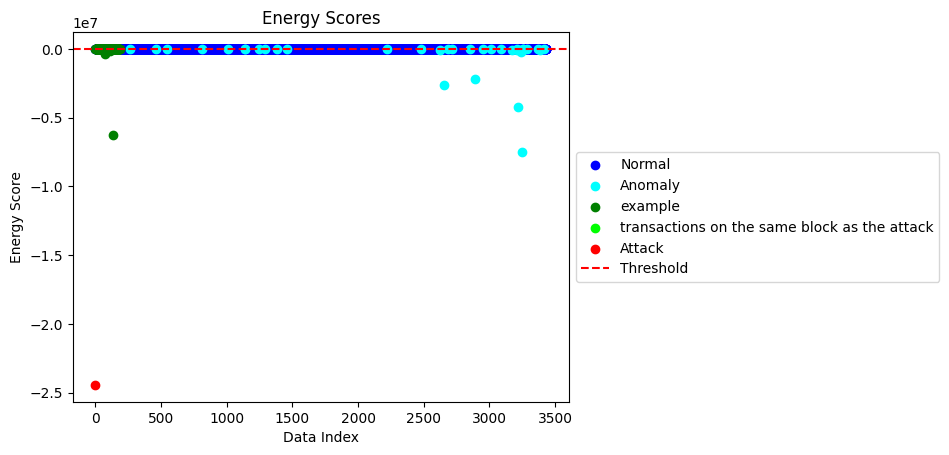

Found you
number of transactions with energy greater or equal to the attack in train is:  0  out of:  2575
number of transactions with energy greater or equal to the attack in test is:  0  out of:  859
number of transactions with energy greater or equal to the attack in example is:  0  out of:  186


In [ ]:
from sklearn import mixture



train_data, test_data = train_test_split(prep_data, test_size=0.25, random_state=40)

clf = mixture.GaussianMixture(n_components=1, covariance_type="full", tol=0.01)
clf.fit(train_data)


# Get anomaly scores for test data
train_energy=clf.score_samples(train_data)
test_energy=clf.score_samples(test_data)
all_energy=np.concatenate((train_energy, test_energy), axis=0)

# Determine anomalies
threshold = np.percentile(all_energy, 1)
print(threshold)




normal_energy=torch.cat((torch.tensor(train_energy), torch.tensor(test_energy)), dim=0)

normal_indices = torch.where(normal_energy > threshold)[0]
anomaly_indices = torch.where(normal_energy <= threshold)[0]
attack = torch.tensor(clf.score_samples(anom.numpy()))
example = torch.tensor(clf.score_samples(exam.numpy()))

print(clf.score_samples(anom.numpy()))


plt.scatter(normal_indices, normal_energy[normal_indices], c='blue', label='Normal')
plt.scatter(anomaly_indices, normal_energy[anomaly_indices], c='cyan', label='Anomaly')
print(attack)

plt.scatter(range(len(example)), example, c='green', label='example')


plt.scatter(range(len(attack[1:3])), attack[1:3], c='lime', label='transactions on the same block as the attack')
plt.scatter(range(1), attack[0], c='red', label='Attack')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.title('Energy Scores')
plt.xlabel('Data Index')
plt.ylabel('Energy Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

if(attack[0]<=threshold):
  print("Found you")
else:
  print("try again")


print("number of transactions with energy greater or equal to the attack in train is: ", len(torch.where(torch.tensor(train_energy) <= attack[0])[0]), " out of: ", len(train_energy))
print("number of transactions with energy greater or equal to the attack in test is: ", len(torch.where(torch.tensor(test_energy) <= attack[0])[0]), " out of: ", len(test_energy))
print("number of transactions with energy greater or equal to the attack in example is: ", len(torch.where(example <= attack[0])[0]), " out of: ", len(example))

###Local outlier factor

-0.10522025709265538
[5.00695858]
tensor([5.0070], dtype=torch.float64)


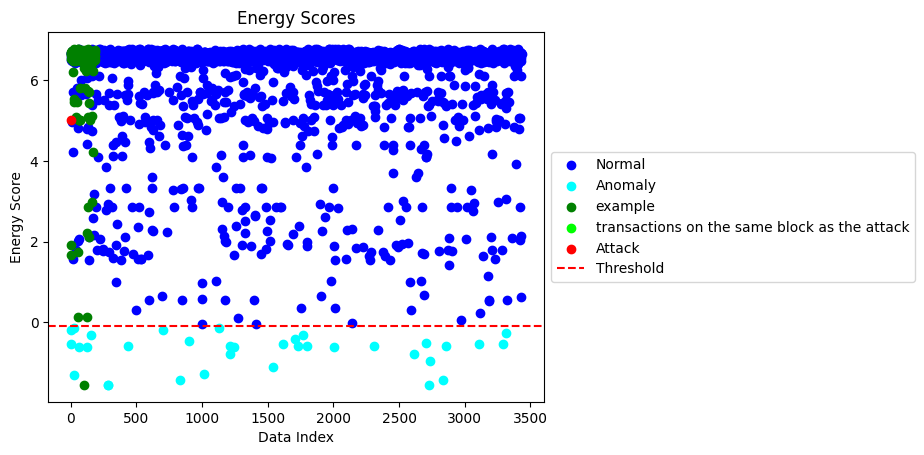

try again
number of transactions with energy greater or equal to the attack in train is:  89  out of:  859
number of transactions with energy greater or equal to the attack in test is:  215  out of:  2575
number of transactions with energy greater or equal to the attack in example is:  11  out of:  186


In [ ]:
from sklearn.neighbors import LocalOutlierFactor



train_data, test_data = train_test_split(prep_data, test_size=0.25, random_state=40, )

clf = LocalOutlierFactor(n_neighbors=200, contamination=0.01, novelty=True)
clf.fit(train_data)


# Get anomaly scores for test data
test_energy=clf.decision_function(train_data)
train_energy=clf.decision_function(test_data)
all_energy=np.concatenate((train_energy, test_energy), axis=0)

# Determine anomalies
threshold = np.percentile(all_energy, 1)
print(threshold)



normal_energy=torch.cat((torch.tensor(train_energy), torch.tensor(test_energy)), dim=0)

normal_indices = torch.where(normal_energy > threshold)[0]
anomaly_indices = torch.where(normal_energy <= threshold)[0]
attack = torch.tensor(clf.decision_function(anom.numpy()))
example = torch.tensor(clf.decision_function(exam.numpy()))

print(clf.decision_function(anom.numpy()))


plt.scatter(normal_indices, normal_energy[normal_indices], c='blue', label='Normal')
plt.scatter(anomaly_indices, normal_energy[anomaly_indices], c='cyan', label='Anomaly')
print(attack)

plt.scatter(range(len(example)), example, c='green', label='example')


plt.scatter(range(len(attack[1:3])), attack[1:3], c='lime', label='transactions on the same block as the attack')
plt.scatter(range(1), attack[0], c='red', label='Attack')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.title('Energy Scores')
plt.xlabel('Data Index')
plt.ylabel('Energy Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

if(attack[0]<=threshold):
  print("Found you")
else:
  print("try again")


print("number of transactions with energy greater or equal to the attack in train is: ", len(torch.where(torch.tensor(train_energy) <= attack[0])[0]), " out of: ", len(train_energy))
print("number of transactions with energy greater or equal to the attack in test is: ", len(torch.where(torch.tensor(test_energy) <= attack[0])[0]), " out of: ", len(test_energy))
print("number of transactions with energy greater or equal to the attack in example is: ", len(torch.where(example <= attack[0])[0]), " out of: ", len(example))

### Bayesian gmm



3896.298372813727
[-34323586.5228597]
tensor([-34323586.5229], dtype=torch.float64)


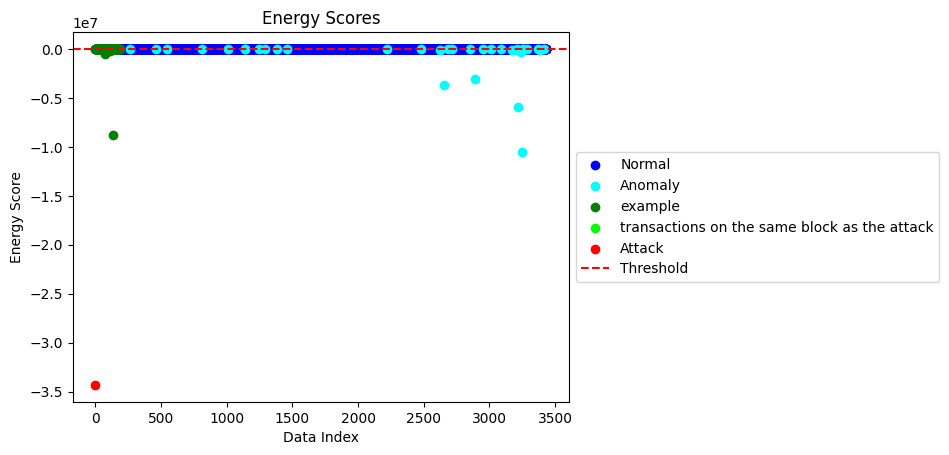

Found you
number of transactions with energy greater or equal to the attack in train is:  0  out of:  2575
number of transactions with energy greater or equal to the attack in test is:  0  out of:  859
number of transactions with energy greater or equal to the attack in example is:  0  out of:  186


In [ ]:
from sklearn import mixture



train_data, test_data = train_test_split(prep_data, test_size=0.25, random_state=40)

clf = mixture.BayesianGaussianMixture(n_components=1, covariance_type="full")
clf.fit(train_data)


# Get anomaly scores for test data
train_energy=clf.score_samples(train_data)
test_energy=clf.score_samples(test_data)
all_energy=np.concatenate((train_energy, test_energy), axis=0)

# Determine anomalies
threshold = np.percentile(all_energy, 1)
print(threshold)




normal_energy=torch.cat((torch.tensor(train_energy), torch.tensor(test_energy)), dim=0)

normal_indices = torch.where(normal_energy > threshold)[0]
anomaly_indices = torch.where(normal_energy <= threshold)[0]
attack = torch.tensor(clf.score_samples(anom.numpy()))
example = torch.tensor(clf.score_samples(exam.numpy()))

print(clf.score_samples(anom.numpy()))


plt.scatter(normal_indices, normal_energy[normal_indices], c='blue', label='Normal')
plt.scatter(anomaly_indices, normal_energy[anomaly_indices], c='cyan', label='Anomaly')
print(attack)

plt.scatter(range(len(example)), example, c='green', label='example')


plt.scatter(range(len(attack[1:3])), attack[1:3], c='lime', label='transactions on the same block as the attack')
plt.scatter(range(1), attack[0], c='red', label='Attack')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.title('Energy Scores')
plt.xlabel('Data Index')
plt.ylabel('Energy Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

if(attack[0]<=threshold):
  print("Found you")
else:
  print("try again")


print("number of transactions with energy greater or equal to the attack in train is: ", len(torch.where(torch.tensor(train_energy) <= attack[0])[0]), " out of: ", len(train_energy))
print("number of transactions with energy greater or equal to the attack in test is: ", len(torch.where(torch.tensor(test_energy) <= attack[0])[0]), " out of: ", len(test_energy))
print("number of transactions with energy greater or equal to the attack in example is: ", len(torch.where(example <= attack[0])[0]), " out of: ", len(example))